<a href="https://colab.research.google.com/github/jeanalyst-keith/91-data-boot-camp/blob/main/Malaria_in_Turkana_DS2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

# **Malaria Prediction and Geospatial Analysis in Turkana County, Kenya**

###**JEAN KEITH OBUNGA - 169376- CAT 2**

## **Abstract:**
Malaria remains a significant public health concern in Turkana County, Kenya.

This study aims to develop predictive models for malaria cases using machine learning and deep learning techniques and to visualize the spatial distribution of malaria risk in the county. The study utilizes a dataset containing weekly malaria case counts, climate data (rainfall, temperature, humidity), and location information (county, sub-county, ward, hospital). Predictive models are built using various algorithms, including Linear Regression, Random Forest, Gradient Boosting, XGBoost, and deep learning models like LSTM and BiLSTM. The performance of the models is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²).

The study also identifies high-risk areas (red zones) based on malaria case counts and visualizes them using geospatial mapping. The findings of this study can aid in targeted interventions, resource allocation, and early warning systems for malaria control in Turkana County.

### **Keywords: Malaria, Predictive Modeling, Machine Learning, Deep Learning, Geospatial Analysis, Turkana County, Kenya**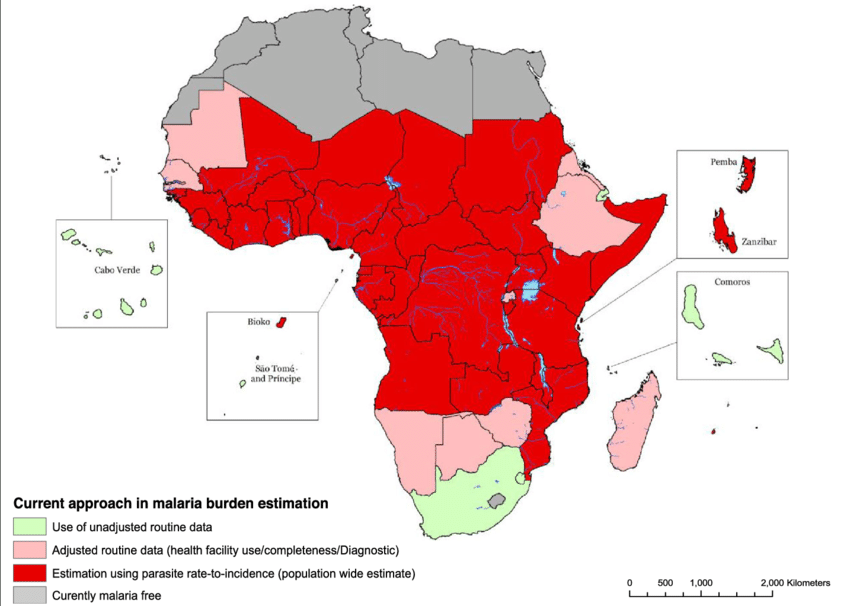



    Introduction
    Malaria is a life-threatening disease transmitted through the bite of infected Anopheles mosquitoes.
    It is a major public health problem in many parts of the world, particularly in sub-Saharan Africa.
    Turkana County, located in northwestern Kenya, is one of the regions with a high burden of malaria.

    This study aims to address this challenge by developing predictive models for malaria cases using machine
    learning and deep learning approaches. The models utilize historical malaria case data,
    climate data (rainfall, temperature, humidity), and location information.
    By leveraging these data sources, the study aims to identify patterns and relationships that can be used to
    predict future malaria outbreaks. Additionally, the study employs geospatial analysis to visualize the
    spatial distribution of malaria risk, enabling targeted interventions and resource allocation.

## **1. Introduction and Setup**

  1.1 Import necessary libraries

  1.2 Upload the dataset

  1.3 Load the dataset

  1.4 Overview of the dataset

  1.5 Exploration of all the sheets in the dataset

###  **1.1 Import necessary libraries**

  This block imports necessary Python libraries and briefly explains their purpose in the project. It's crucial for reproducibility and understanding the tools used

In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    f1_score,
    roc_curve,
    auc
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

!pip install xgboost
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

!pip install catboost
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
!pip install shapely
from shapely.geometry import Point

!pip install geopandas # Install geopandas
import geopandas as gpd # Now you can import geopandas
import warnings

# Ignore warnings for clean outputs
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 113.4 MB/s eta 0:00:00


###  **1.2 Upload the dataset**

  This block demonstrates how to upload the dataset to the Google Colab environment using the files.upload() function. This step assumes you have your data file (likely an Excel file) ready to be uploaded.


In [2]:

# Load the data
from google.colab import files
uploaded = files.upload()

Saving weekly_malaria_data_with_climate (1).xlsx to weekly_malaria_data_with_climate (1).xlsx



###  **1.3 Load the dataset**

This block loads the data from your Excel file into Pandas DataFrames. It specifies the sheet names to access different datasets within the file. Using pd.read_excel with the openpyxl engine is suitable for reading Excel files.






In [3]:
# Load datasets from Excel file
!pip install openpyxl
file_path = 'weekly_malaria_data_with_climate (1).xlsx'
county_data = pd.read_excel(file_path, sheet_name='5 yr Weekly County mal data', engine='openpyxl')
sub_county_data = pd.read_excel(file_path, sheet_name='5 yr Wkly data per S.County', engine='openpyxl')
ward_data = pd.read_excel(file_path, sheet_name='5 yr wkly data per Ward', engine='openpyxl')
hospital_data = pd.read_excel(file_path, sheet_name='5 yr wkly data for select Hosp', engine='openpyxl')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.0 MB/s eta 0:00:00



###  **1.4 Overview of the dataset**

  This block provides an overview of the loaded datasets by displaying their shapes (number of rows and columns). This information gives an initial understanding of the data size and structure.
  
  This tells you how much data you're working with at each level (county, sub-county, ward, hospital).


In [4]:

# Describe the shape of the county_data DataFrame
print("Shape of county_data:", county_data.shape)

# Describe the shape of the sub_county_data DataFrame
print("Shape of sub_county_data:", sub_county_data.shape)

# Describe the shape of the ward_data DataFrame
print("Shape of ward_data:", ward_data.shape)

# Describe the shape of the hospital_data DataFrame
print("Shape of hospital_data:", hospital_data.shape)

Shape of county_data: (210, 7)
Shape of sub_county_data: (2281, 7)
Shape of ward_data: (6174, 7)
Shape of hospital_data: (6222, 7)


  
###  **1.5 Exploration of all the sheets in the dataset**

  This block explores the datasets in more detail using info() and head().
  
*   info() shows the data types of each column, the number of non-null values,and memory usage.
*   head() displays the first few rows, allowing you to see the actual data.


  Analysis:

*   Data Types: Make sure the data types are correct (e.g., dates are recognized as dates, numerical values are as numbers).
*   Missing Values: Look for any missing values (NaN) and consider how to handle them (imputation or removal).
*   Column Names: Understand the meaning of each column.

In [5]:
# Initial exploration of all sheets
print("County Data Overview:")
print(county_data.info())
print("\nSample County Data:")
print(county_data.head())

print("\nSub-County Data Overview:")
print(sub_county_data.info())
print("\nSample Sub-County Data:")
print(sub_county_data.head())

print("\nWard Data Overview:")
print(ward_data.info())
print("\nSample Ward Data:")
print(ward_data.head())

print("\nHospital Data Overview:")
print(hospital_data.info())
print("\nSample Hospital Data:")
print(hospital_data.head())


County Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Organization Unit  210 non-null    object 
 1   Week               210 non-null    object 
 2   Period             210 non-null    object 
 3   Cases              210 non-null    object 
 4   Temperature        210 non-null    float64
 5   Humidity           210 non-null    float64
 6   Rainfall           210 non-null    float64
dtypes: float64(3), object(4)
memory usage: 11.6+ KB
None

Sample County Data:
   Organization Unit    Week               Period  Cases  Temperature  \
0  Organisation unit    week               Period  Value    30.532988   
1     Turkana County  Week 1  2020-01-05 00:00:00   4870    28.768407   
2     Turkana County  Week 2  2020-01-12 00:00:00   5052    37.048069   
3     Turkana County  Week 3  2020-01-19 00:00:00   7560    35.418814  

## **2. Preprocessing**

  This block defines a preprocess_data function to clean and prepare the data for modeling. The function performs the following steps:

  *   **Date Conversion:** Converts the 'Period' column to datetime objects.
  *   **Handling Invalid Dates:** Removes rows with invalid or missing dates.
  *   **Temporal Feature Engineering:**Extracts year, month, and week from the date column and adds them as new features.
  *   **Lag Feature Engineering**: Creates lag features for the target variable ('Cases') to capture historical trends. Lag features represent the values of the target variable from previous time periods (e.g., Cases_lag1 represents the number of cases from the previous week).
  *   **Handling Missing Values:** Drops rows with missing values introduced by lagging.

  The function is then applied to all four datasets (county, sub-county, ward, and hospital).



In [6]:
# Function to clean and preprocess data
def preprocess_data(df, date_col='Period', target_col='Cases'):
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # Convert dates
    df.dropna(subset=[date_col], inplace=True)  # Drop rows with invalid dates

    # Add temporal features
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Week'] = df[date_col].dt.isocalendar().week

    # Create lag features
    for lag in range(1, 5):
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)

    # Drop rows with NaN values caused by lagging
    df.dropna(inplace=True)
    return df

# Preprocess datasets
county_data = preprocess_data(county_data, date_col='Period', target_col='Cases')
sub_county_data = preprocess_data(sub_county_data, date_col='Period', target_col='Cases')
ward_data = preprocess_data(ward_data, date_col='Period', target_col='Cases')
hospital_data = preprocess_data(hospital_data, date_col='Period', target_col='Cases')

# Display processed data
print("Processed County Data:")
print(county_data.head())


Processed County Data:
  Organization Unit  Week     Period Cases  Temperature   Humidity   Rainfall  \
5    Turkana County     5 2020-02-02  6208    32.568982  30.804558   0.793333   
6    Turkana County     6 2020-02-09  5312    31.702421  28.049021  10.086204   
7    Turkana County     7 2020-02-16  5543    31.205212  22.029006  12.090279   
8    Turkana County     8 2020-02-23  8024    36.744625  28.770148  10.342899   
9    Turkana County     9 2020-03-01  6711    31.896947  25.590342   1.837666   

   Year  Month Cases_lag1 Cases_lag2 Cases_lag3 Cases_lag4  
5  2020      2       8103       7560       5052       4870  
6  2020      2       6208       8103       7560       5052  
7  2020      2       5312       6208       8103       7560  
8  2020      2       5543       5312       6208       8103  
9  2020      3       8024       5543       5312       6208  


## **3. Exploratory Data Analysis (EDA)**
  
  This block focuses on Exploratory Data Analysis (EDA) specifically looking at feature distributions and potential outliers using boxplots.
  

### **3.1 Boxplots and Outlier Analysis**

  *  **boxplot_features Function:** Creates boxplots for specified features to visualize their distributions.
  *  **Boxplot Creation:** Boxplots are generated for 'Cases', 'Rainfall', and 'Temperature' in the county_data DataFrame.

**Analysis:**

  *  **Distribution:** Observe the shape of the boxplots to understand the distribution of each feature. Are they skewed? Symmetrical?
  *  **Outliers:** Look for data points outside the whiskers of the boxplots. These are potential outliers that might need to be addressed.
  *  **Insights:** Boxplots can help identify unusual patterns or potential data quality issues.

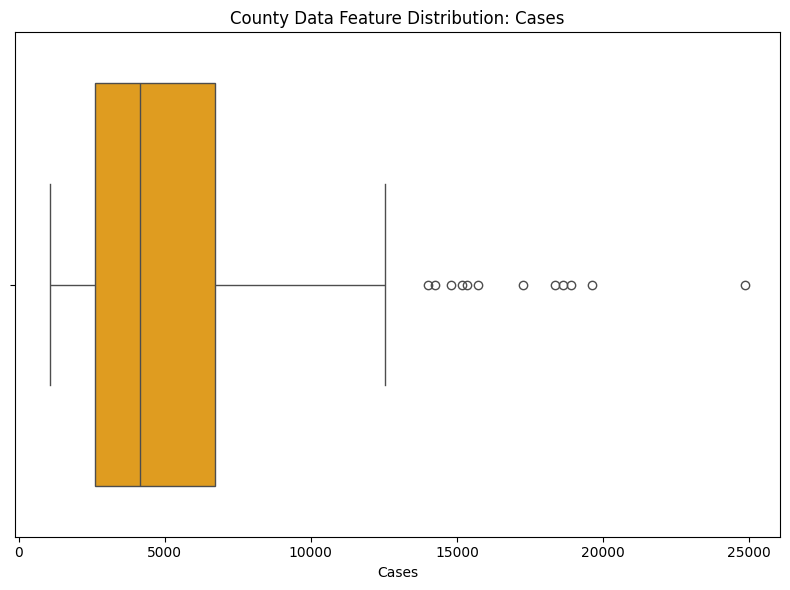

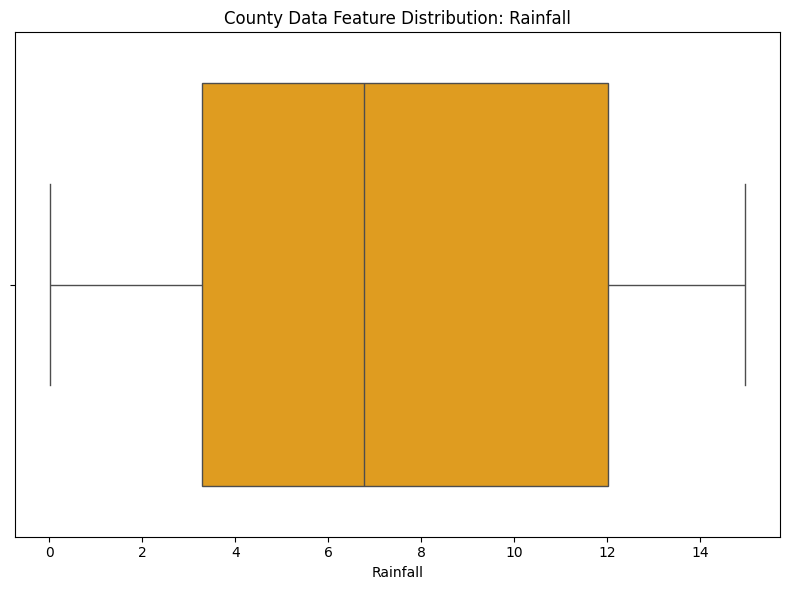

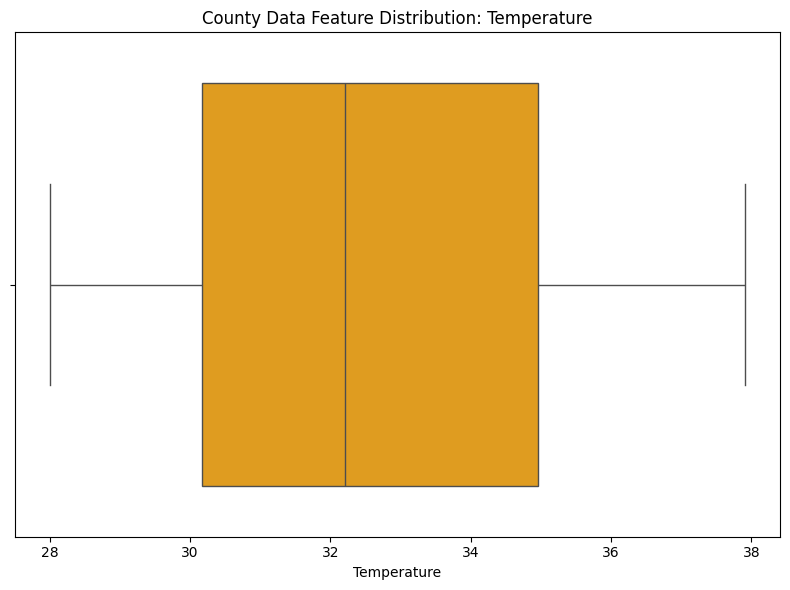

In [7]:
# Function to create boxplots
def boxplot_features(df, feature_cols, title_prefix):
    for feature in feature_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=feature, color="orange")
        plt.title(f"{title_prefix}: {feature}")
        plt.tight_layout()
        plt.show()

boxplot_features(county_data, ['Cases', 'Rainfall', 'Temperature'], "County Data Feature Distribution")


###  **3.2 Correlation Analysis**

  Analysis:

  * **Negative Correlation:** Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
  * **Weak Correlation:** Values close to 0 indicate a weak or no correlation.
  * **Insights:** Identify features that are strongly correlated with the target variable ('Cases'). These features are likely to be important predictors. Also, look for correlations between predictor variables (multicollinearity).

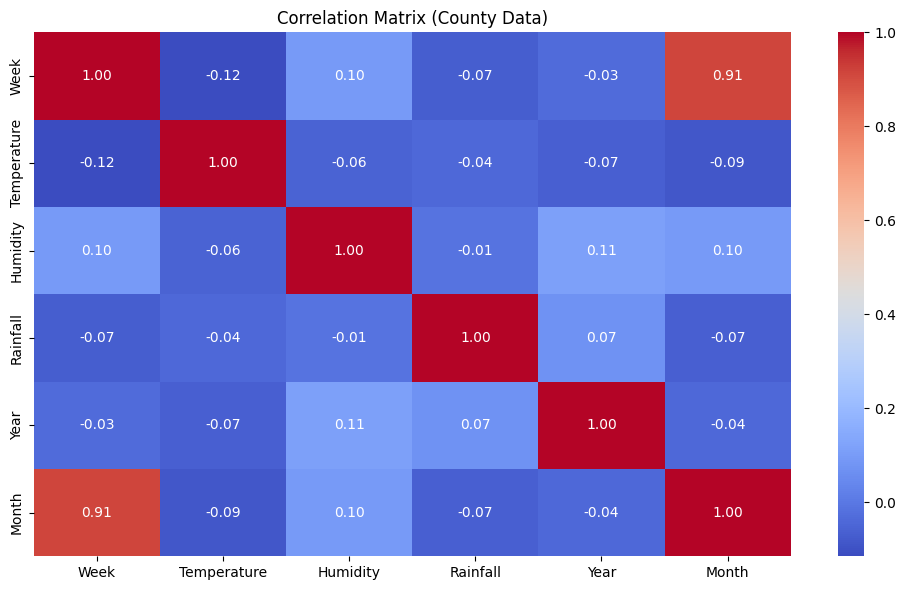

In [8]:
# Generate a heatmap to analyze correlations
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = county_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (County Data)")
plt.tight_layout()
plt.show()

###  **3.3 Trends Visualization**
  
  This block visualizes trends in malaria cases over time using line plots.

  * **plot_trends Function:** Creates line plots to show trends in malaria cases.
  * **Trend Visualization:** A line plot is generated showing malaria cases by week, with different lines representing different years.
**Analysis:**

  * **Seasonal Patterns:** Look for any recurring patterns or seasonality in malaria cases. Are there specific times of the year when cases tend to increase or decrease?
  * **Yearly Trends:** Observe any overall trends in malaria cases over the years. Are cases generally increasing, decreasing, or staying relatively stable?
  * **Insights:** Understanding trends can help in identifying potential factors influencing malaria transmission and in developing targeted interventions.

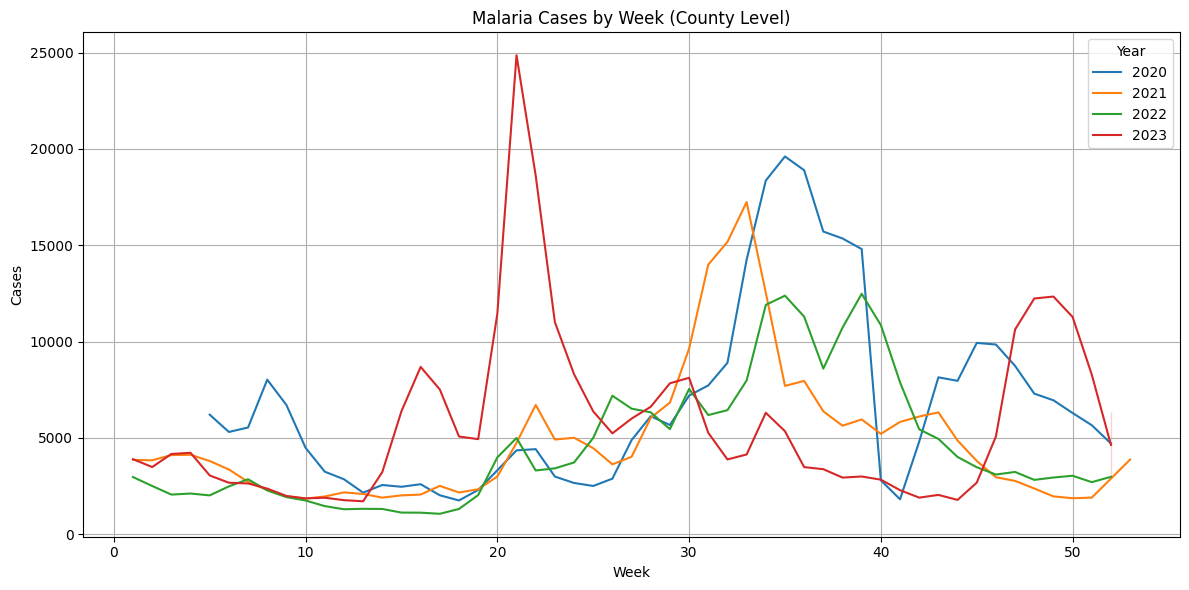

In [9]:
# Function to plot malaria trends
def plot_trends(df, title, x_col='Week', y_col='Cases', hue_col='Year'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue_col, palette='tab10')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_trends(county_data, "Malaria Cases by Week (County Level)")


## **4. Feature Engineering**

  This block focuses on feature engineering, which involves creating new features or transforming existing ones to improve model performance.

  * Feature Scaling: The StandardScaler is used to scale numerical features (Rainfall, Temperature, and lag features) to have zero mean and unit variance. This helps prevent features with larger values from dominating the model.
  * Interaction Term: An interaction term ('Rainfall_Temp_Interaction') is created by multiplying Rainfall and Temperature. This captures the combined effect of these two climate variables.

Rationale:

  * Feature scaling is often beneficial for machine learning models, especially those that are sensitive to the scale of features.
  * Interaction terms can help models capture complex relationships between features.

In [10]:
# Scale features and add interaction terms
scaler = StandardScaler()
features_to_scale = ['Rainfall', 'Temperature', 'Cases_lag1', 'Cases_lag2', 'Cases_lag3', 'Cases_lag4']
county_data[features_to_scale] = scaler.fit_transform(county_data[features_to_scale])
county_data['Rainfall_Temp_Interaction'] = county_data['Rainfall'] * county_data['Temperature']


## **5. Predictive Modeling with Machine Learning**
      
   We will implement the following machine learning models:

   5.1 Linear Regression (LR)

   5.2 Random Forest (RF)

   5.3 Gradient Boosting (GB)

   5.4 Decision Tree (DT)

   5.5 Support Vector Regression (SVR)

   5.6 XGBoost (XGB)

   5.7 k-Nearest Neighbors (KNN)

   5.8 CatBoost (CB)

   5.9 Comparison of All Predictive Models


    Insights and Summary

    Best Model:

    The model with the highest R² and lowest MSE should be identified as the most suitable for malaria case prediction.

    Typically, models like Random Forest, Gradient Boosting, and XGBoost perform well on structured/tabular data.

    In this case, compare R² and MSE values to decide the winner.

    Feature Importance:

    Features such as Rainfall, Temperature, and lag variables (Cases_lag1, Cases_lag2, etc.) play a crucial role in predicting malaria cases.

    Importance plots from models like Random Forest, Gradient Boosting, and CatBoost provide actionable insights.

    Considerations:

    Simpler models like Linear Regression may be less accurate but offer greater interpretability.

    Advanced models like CatBoost and XGBoost tend to outperform others on more complex relationships.

### **Data Preparation for Predictive Modeling**


  This block prepares the data for predictive modeling.

* Feature and Target Selection: The features (predictor variables) and target (variable to be predicted) are defined.
* Data Splitting: The data is split into training and testing sets using train_test_split. 80% of the data is used for training, and 20% for testing. The random_state ensures reproducibility.

In [11]:
# Splitting the data into training and testing sets
features = ['Rainfall', 'Temperature', 'Humidity', 'Cases_lag1', 'Cases_lag2', 'Cases_lag3', 'Cases_lag4']
target = 'Cases'

X = county_data[features]
y = county_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared successfully!")


Training and testing data prepared successfully!


### **5.1 Linear Regression (LR)**

   This block implements and evaluates a Linear Regression model.

  * **Model Training:** A Linear Regression model is created and trained using the training data.
  * **Prediction:** Predictions are made on the test data.
  * **Evaluation:** The model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R²).
  * **Visualization:** The code also includes visualization of actual vs. predicted values and a regression line.

**Analysis:**

  * **MSE:** A lower MSE indicates better model performance.
  * **R²:** A higher R² (closer to 1) indicates a better fit of the model to the data.
  * **Interpret Results:** Analyze the MSE and R² values to assess the accuracy of the Linear Regression model in predicting malaria cases.

Linear Regression - MSE: 1433927.54, R²: 0.90


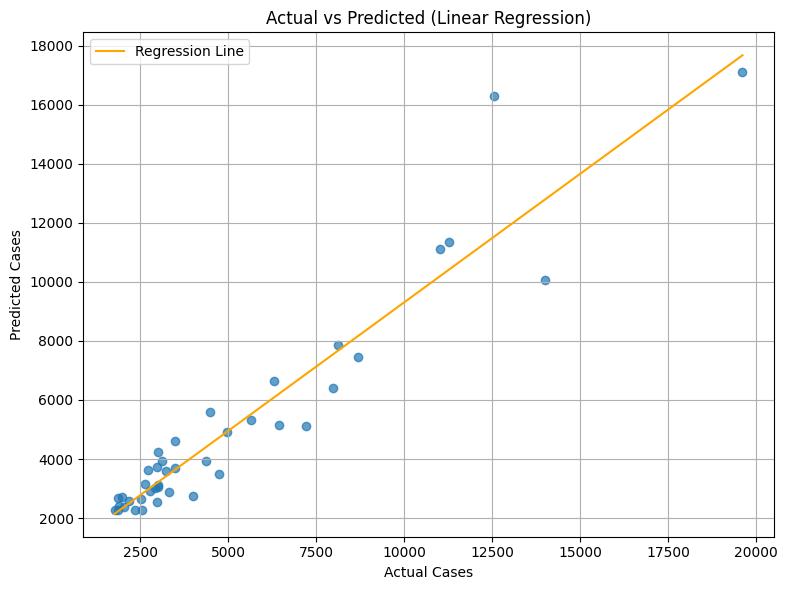

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

# Convert y_test and y_pred_lr to numeric type before calling polyfit
y_test_numeric = pd.to_numeric(y_test, errors='coerce') # errors='coerce' handles errors by setting to NaN (Not a Number)
y_pred_lr_numeric = pd.to_numeric(y_pred_lr, errors='coerce')

# Calculate regression line
slope, intercept = np.polyfit(y_test_numeric, y_pred_lr_numeric, 1)
x_line = np.array([min(y_test_numeric), max(y_test_numeric)])  # Range for the line
y_line = slope * x_line + intercept

# Visualization of Actual vs Predicted with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)  # Scatter plot
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###  **5.2 Random Forest (RF)**

  This block implements and evaluates a Random Forest model.

* **Model Training:** A Random Forest model is created and trained.
Prediction and Evaluation: Predictions are made, and the model is evaluated using MSE and R².
* **Feature Importance:** The code also visualizes the importance of different features in the Random Forest model.

Analysis:

* **Compare with Linear Regression:** Compare the MSE and R² values of the Random Forest model with those of the Linear Regression model. Which model performs better?
* **Feature Importance:** Identify the most important features in predicting malaria cases according to the Random Forest model.

Random Forest - MSE: 1836194.51, R²: 0.88


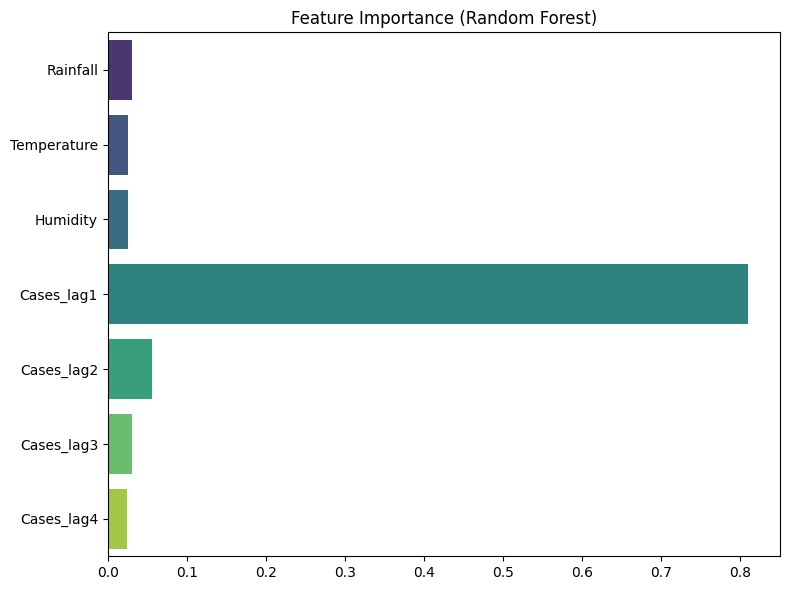

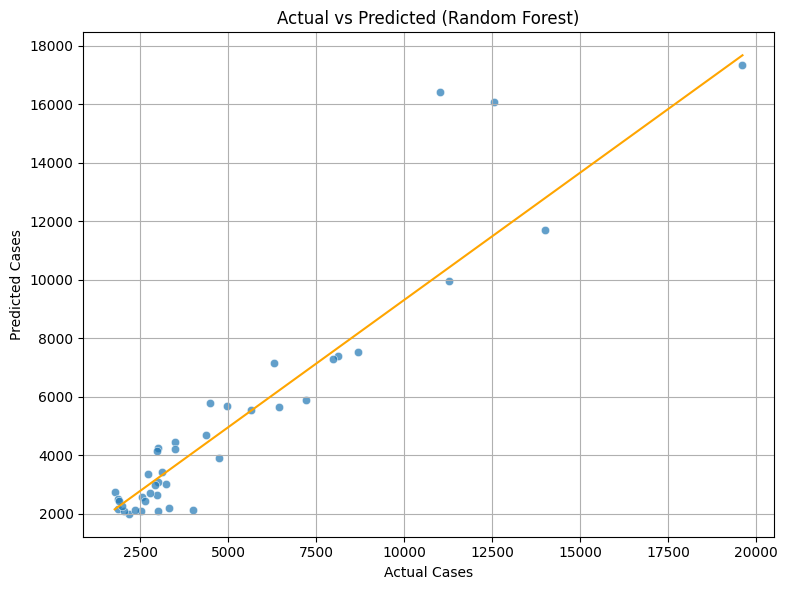

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# Feature Importance
importance_rf = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance_rf, y=features, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


###  **5.3 Gradient Boosting (GB)**

This block implements and evaluates a Gradient Boosting model.

* Model Training, Prediction, Evaluation: Similar steps as in previous models.

Analysis:

* Compare with Previous Models: Compare with Previous Models: Compare the performance of Gradient Boosting with Linear Regression and Random Forest. Is there an improvement in MSE and R²?


Gradient Boosting - MSE: 1928185.69, R²: 0.87


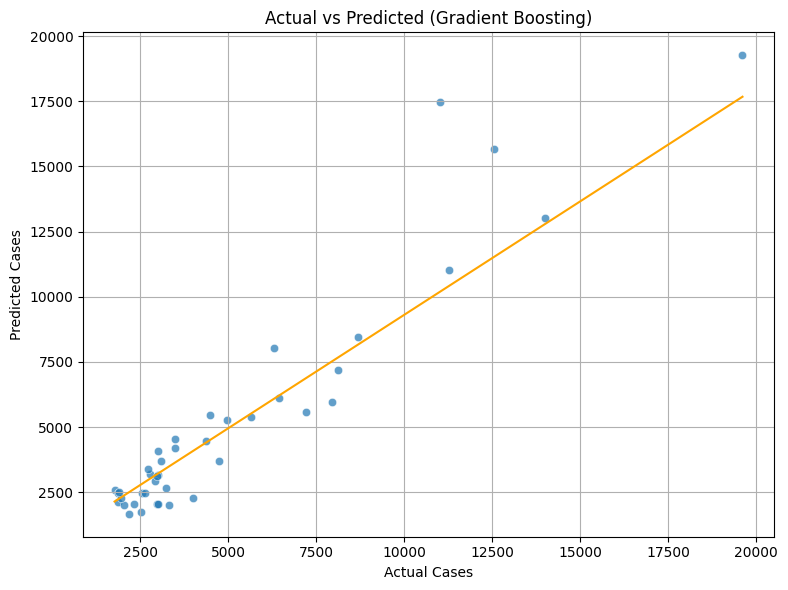

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


##  **5.4 Decision Tree (DT)**
This block implements and evaluates a Decision Tree model.

* Model Training, Prediction, Evaluation: Similar steps as before.

Analysis:

* Compare with Other Models: How does the Decision Tree's performance compare to the other models?
* Interpretability: Decision Trees are relatively easy to interpret. You can examine the tree structure to understand how decisions are being made.


Decision Tree - MSE: 6175166.37, R²: 0.58


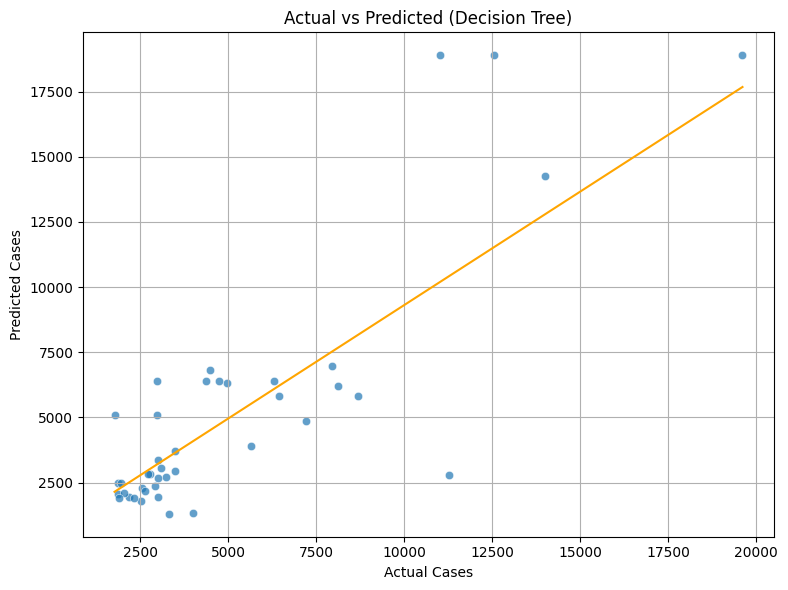

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Train and evaluate Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (Decision Tree)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


##  **5.5 Support Vector Regression (SVR)**

This block implements and evaluates a Support Vector Regression (SVR) model.

* Model Training, Prediction, Evaluation: Similar steps as before.

Analysis:

* Compare with Other Models: Assess the performance of SVR relative to the other models. SVR is often effective for complex datasets.

SVR - MSE: 15002760.97, R²: -0.01


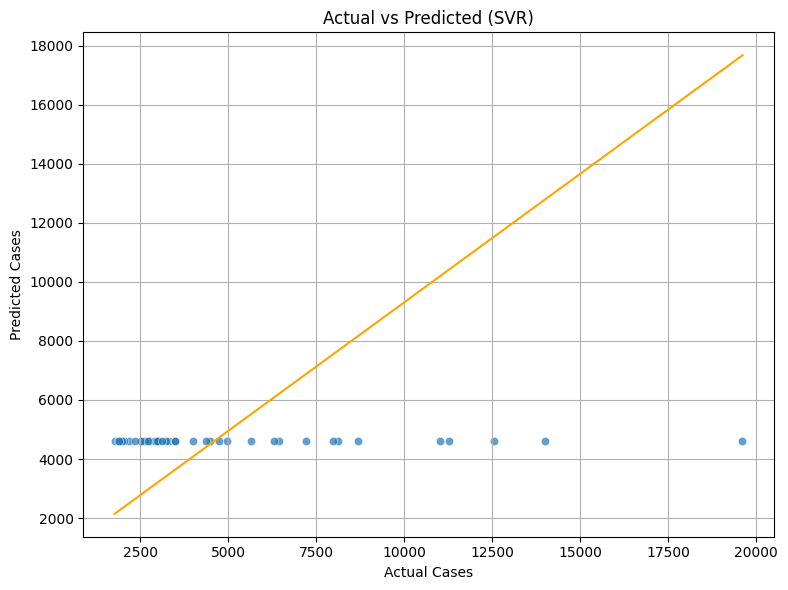

In [16]:
from sklearn.svm import SVR

# Train and evaluate Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (SVR)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()



##  **5.6 XGBoost (XGB)**
This block implements and evaluates an XGBoost model.

* Model Training, Prediction, Evaluation: Similar steps as before.
Feature Importance: Like Random Forest, XGBoost also provides feature importance scores.

Analysis:

* Compare with Other Models: XGBoost is often a top-performing model. Compare its MSE and R² to the other models.
* Feature Importance: Analyze the feature importance scores to understand which features are most influential in XGBoost's predictions.

XGBoost - MSE: 2239462.58, R²: 0.85


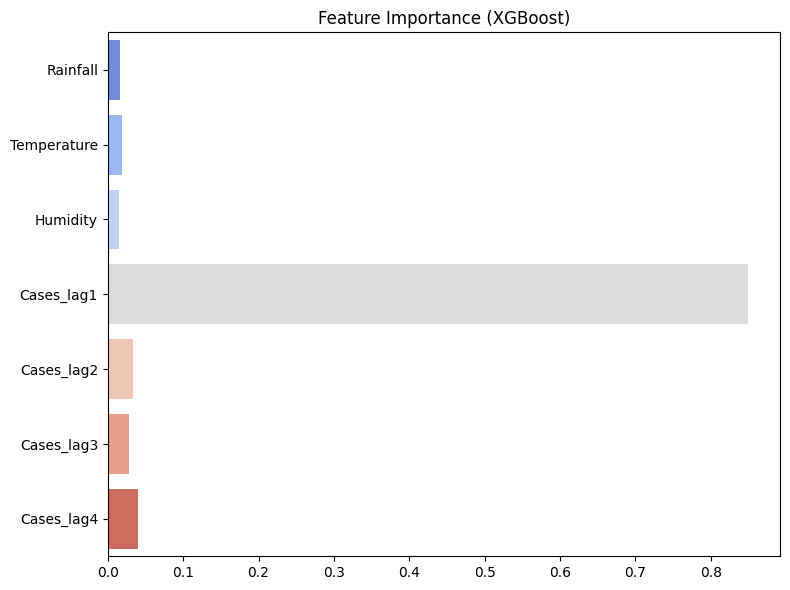

In [17]:
from xgboost import XGBRegressor

# Train and evaluate XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")

# Feature Importance
importance_xgb = xgb_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance_xgb, y=features, palette='coolwarm')
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()



##  **5.7 k-Nearest Neighbors (KNN)**
This block implements and evaluates a k-Nearest Neighbors (KNN) model.

* Model Training, Prediction, Evaluation: Similar steps as before.

Analysis:

* Compare with Other Models: How does KNN's performance compare to the other models? KNN can be sensitive to the choice of the number of neighbors (k).


KNN - MSE: 5553467.24, R²: 0.63


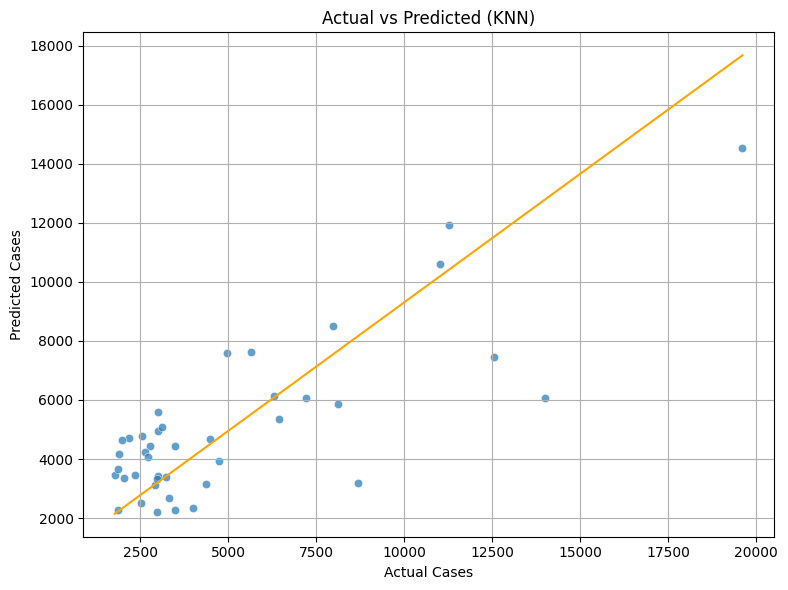

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# Train and evaluate KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (KNN)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


## **5.8 CatBoost (CB)**

This block implements and evaluates a CatBoost model.

* Model Training, Prediction, Evaluation: Similar steps as before.
* Feature Importance: CatBoost provides feature importance scores.

Analysis:

* Compare with Other Models: CatBoost is another powerful model. Compare its performance to the other models.
* Feature Importance: Analyze the feature importance scores to understand which features are most impactful for CatBoost.

CatBoost - MSE: 1724473.97, R²: 0.88
    Feature Id  Importances
0   Cases_lag1    57.958392
1   Cases_lag4     9.699730
2     Humidity     8.461295
3  Temperature     6.888928
4     Rainfall     6.684690
5   Cases_lag2     5.617579
6   Cases_lag3     4.689387


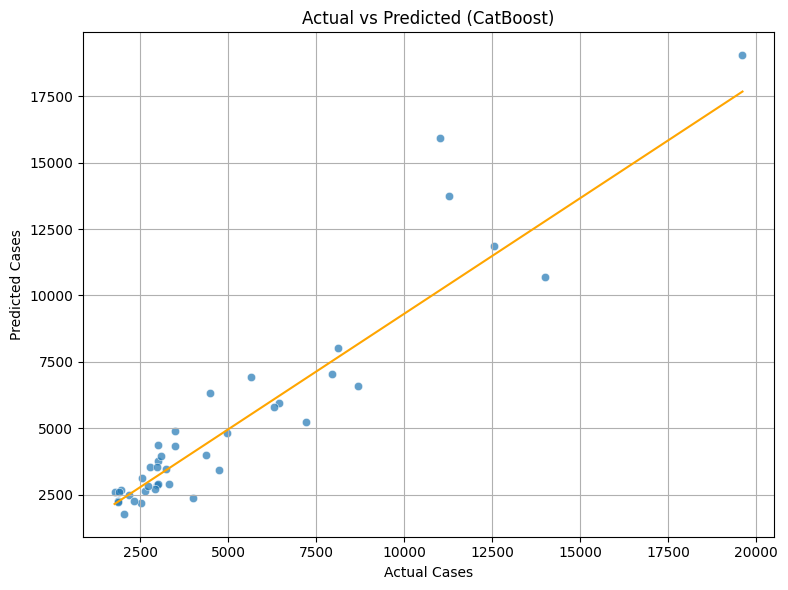

In [19]:
from catboost import CatBoostRegressor

# Train and evaluate CatBoost
cb_model = CatBoostRegressor(iterations=100, verbose=0, random_state=42)
cb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_cb = cb_model.predict(X_test)
mse_cb = mean_squared_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)
print(f"CatBoost - MSE: {mse_cb:.2f}, R²: {r2_cb:.2f}")

# Feature Importance
importance_cb = cb_model.get_feature_importance(prettified=True)
print(importance_cb)

# Visualization of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_cb, alpha=0.7)
plt.plot(x_line, y_line, color='orange', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (CatBoost)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


## **5.9 Comparison of All Predictive Models**

This block compares the performance of all the machine learning models that were evaluated.

* Results Summary: A DataFrame (results) is created to store the MSE and R² values for each model.
* Visualization: Bar plots are generated to visually compare the R² and MSE scores of the models.

Analysis:

* Best Performing Model: Identify the model with the lowest MSE and highest R². This model is generally considered the best performing for this dataset.
* Model Comparison: Compare the performance of different models and discuss their relative strengths and weaknesses.
* Insights: Based on the model comparison, draw conclusions about which types of models are most suitable for predicting malaria cases in this context.

Model Performance Summary:
               Model           MSE        R²
0  Linear Regression  1.433928e+06  0.903395
1      Random Forest  1.836195e+06  0.876294
2  Gradient Boosting  1.928186e+06  0.870096
3      Decision Tree  6.175166e+06  0.583973
4                SVR  1.500276e+07 -0.010751
5            XGBoost  2.239463e+06  0.849125
6                KNN  5.553467e+06  0.625857
7           CatBoost  1.724474e+06  0.883820


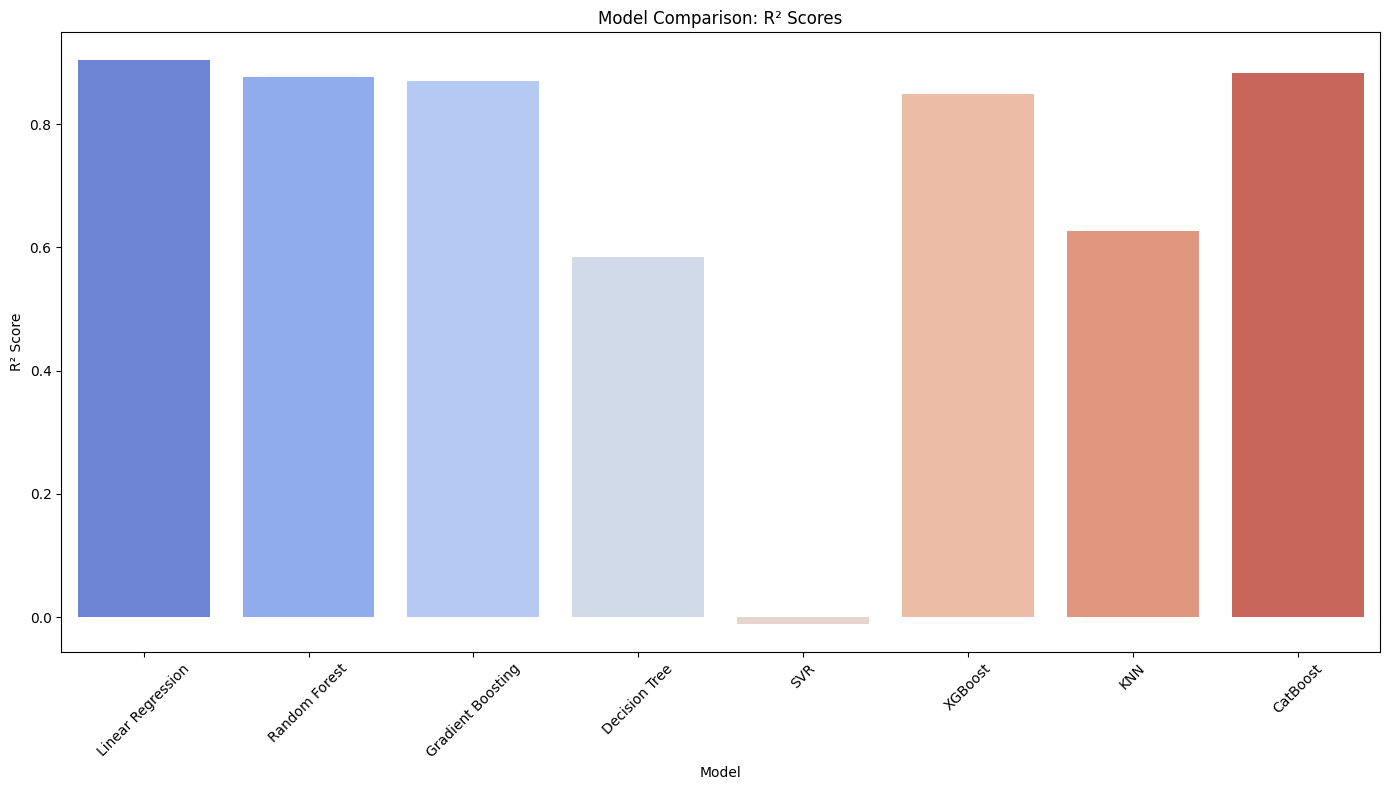

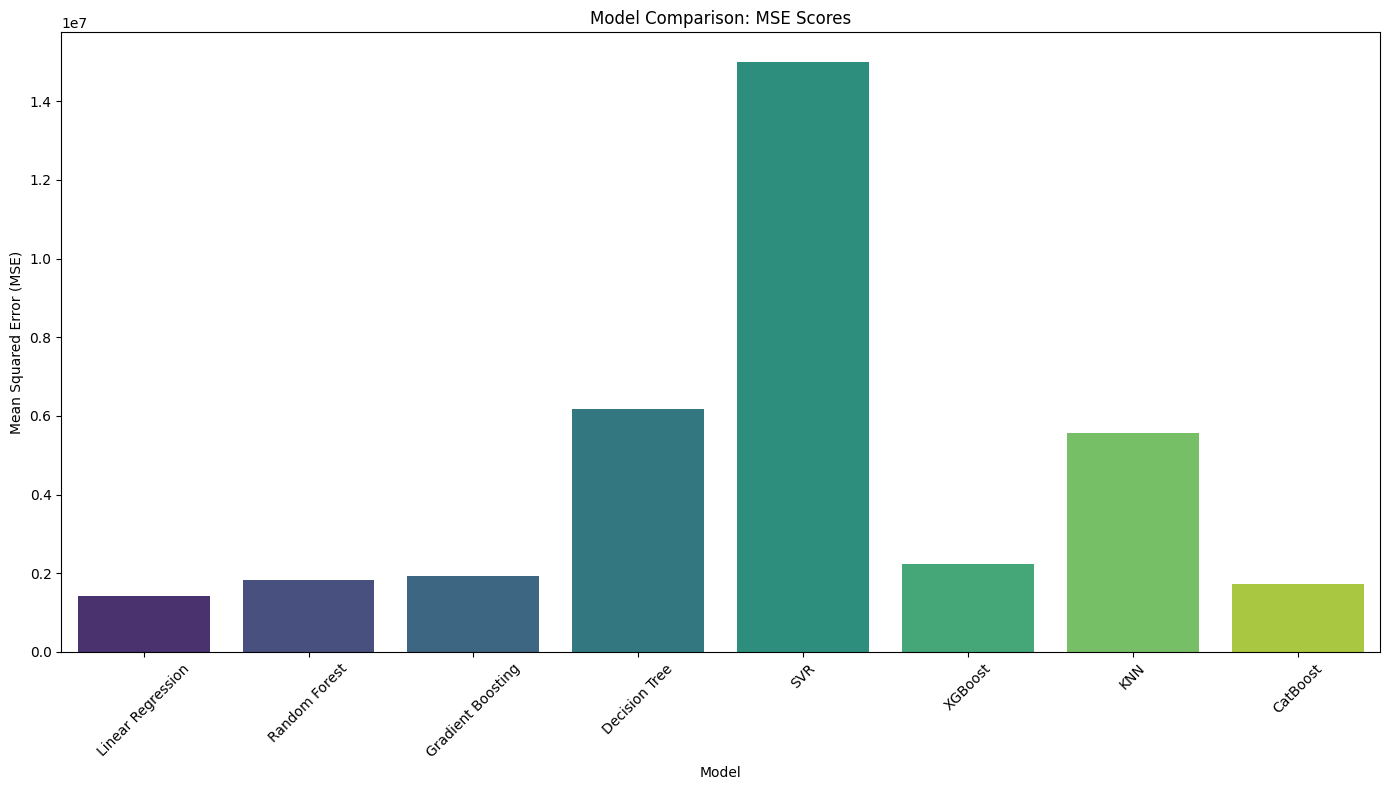

In [20]:
# Summarize results for all models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree",
              "SVR", "XGBoost", "KNN", "CatBoost"],
    "MSE": [mse_lr, mse_rf, mse_gb, mse_dt, mse_svr, mse_xgb, mse_knn, mse_cb],
    "R²": [r2_lr, r2_rf, r2_gb, r2_dt, r2_svr, r2_xgb, r2_knn, r2_cb]
})

# Display the results
print("Model Performance Summary:")
print(results)

# Visualization of R² Scores for Comparison
plt.figure(figsize=(14, 8))
sns.barplot(data=results, x="Model", y="R²", palette="coolwarm")
plt.title("Model Comparison: R² Scores")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of MSE for Comparison
plt.figure(figsize=(14, 8))
sns.barplot(data=results, x="Model", y="MSE", palette="viridis")
plt.title("Model Comparison: MSE Scores")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **6. Predictive Modeling with Deep Learning Models**
This block introduces the section on deep learning models. It lists the deep learning models that will be explored: DNN, LSTM, GRU, BiLSTM, CNN, and Hybrid CNN-LSTM. It also mentions that these models will be evaluated using MSE and R² and compared to each other and the machine learning models.

  We will implement the following deep learning models:
  
  6.1 Dense Neural Networks (DNN)
  
  6.2 Long Short-Term Memory (LSTM)
  
  6.3 Gated Recurrent Units (GRU)
  
  6.4 Bidirectional LSTMs (BiLSTM)
  
  6.5 Convolutional Neural Networks (CNNs) (adapted for time-series data)
  
  6.6 Hybrid CNN-LSTM models
  
  6.7 Comparison of All Deep learning Models


  The models are implemented below, evaluated with MSE and R², and compared against each other and the previously implemented machine learning models.

### **Preparation for Deep Learning**
This block prepares the data for deep learning models.

* Reshaping: The input data (X) is reshaped to be compatible with recurrent neural networks (RNNs) like LSTM, GRU, and BiLSTM. The data is transformed into a 3D array with shape (samples, timesteps, features).
* Splitting: The reshaped data is split into training and testing sets using train_test_split.

In [21]:
# Prepare data for deep learning
X_lstm = np.array(X).reshape(-1, 1, X.shape[1])  # Reshape for LSTM, GRU, and BiLSTM
y_lstm = np.array(y)

# Split into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)


###  **6.1 Dense Neural Networks (DNN)**

This code block builds and evaluates a Dense Neural Network (DNN) to predict malaria cases. It uses a sequential model with an input layer (128 neurons, ReLU activation), a dropout layer (0.2 rate), a hidden layer (64 neurons, ReLU activation), and an output layer (1 neuron).

The model is trained using the Adam optimizer and Mean Squared Error (MSE) loss. It's trained for 50 epochs with a batch size of 32, using 20% of the training data for validation.

Predictions are made on the test data, and the model's performance is assessed using MSE and R-squared (R²). Lower MSE and higher R² values indicate better predictive accuracy.

In essence, this code block constructs, trains, and evaluates a DNN for malaria case prediction, utilizing standard deep learning practices and metrics.

Key points:

* Model type: Dense Neural Network (DNN)
* Architecture: Input, dropout, hidden, and output layers with specified neurons and activation functions.
* Training: Adam optimizer, MSE loss, 50 epochs, batch size 32, 20% validation split.
* Evaluation: MSE and R² metrics.
* Purpose: Malaria case prediction.

2/2 [==============================] - 0s 3ms/step
DNN - MSE: 11991110.90, R²: 0.19


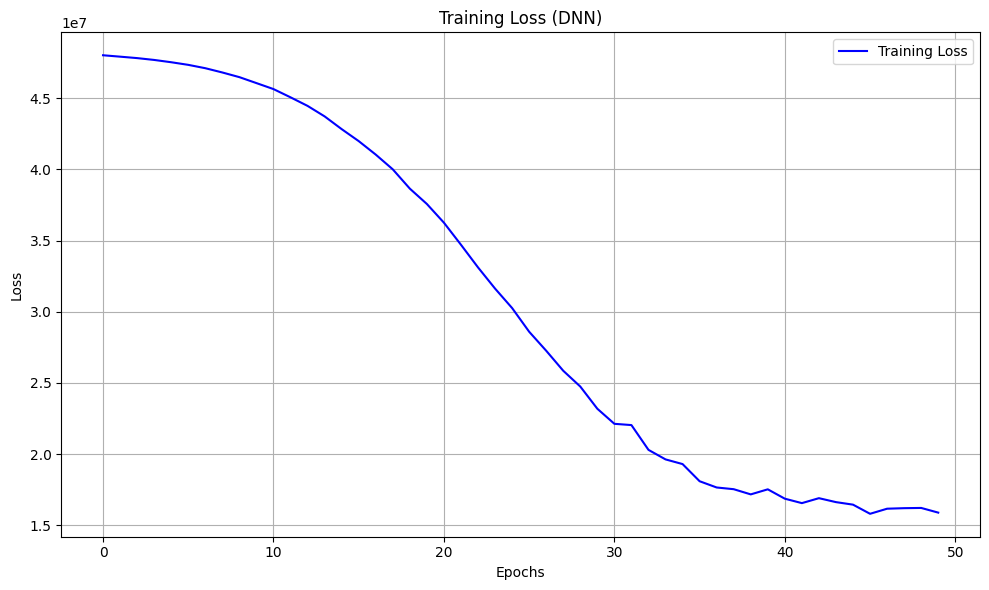

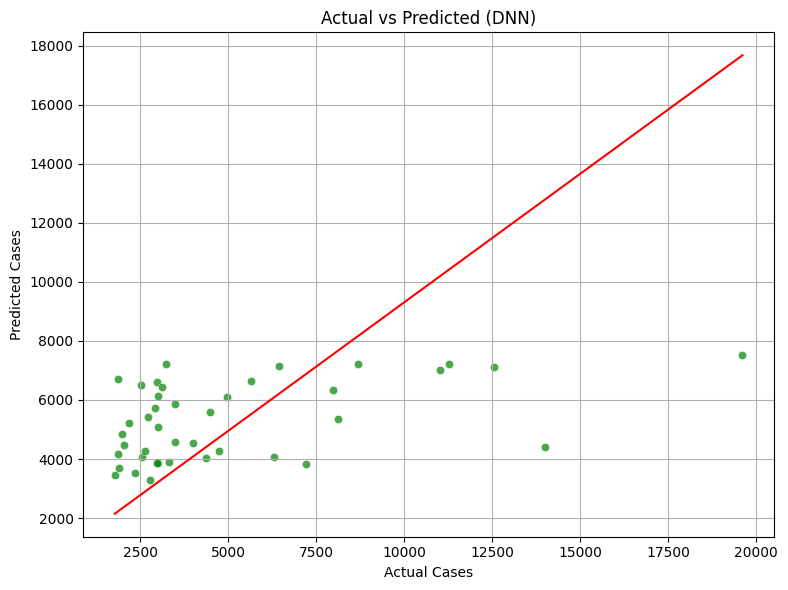

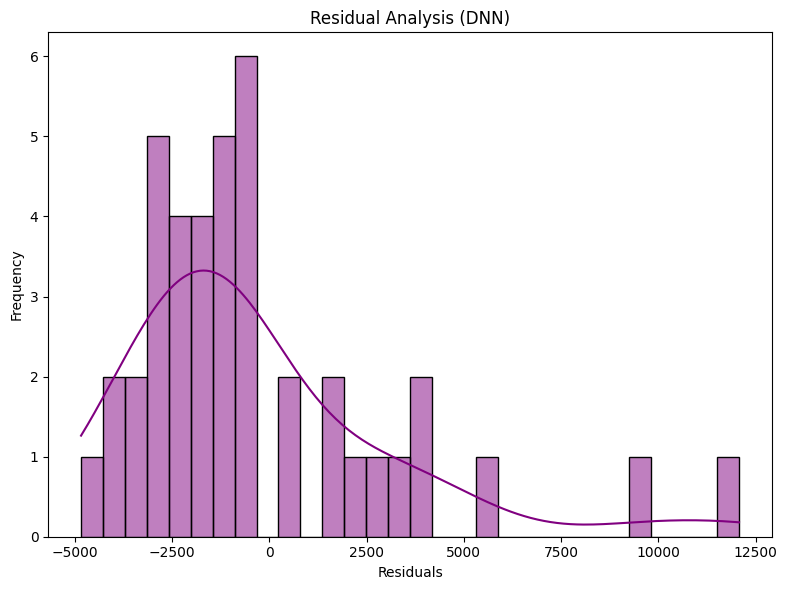

In [22]:
# Convert X_train and y_train to float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Build and train a DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])
dnn_model.compile(optimizer='adam', loss='mse')
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Build and train a DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])
dnn_model.compile(optimizer='adam', loss='mse')
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate
y_pred_dnn = dnn_model.predict(X_test)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)
print(f"DNN - MSE: {mse_dnn:.2f}, R²: {r2_dnn:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_dnn.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (DNN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dnn.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (DNN)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test - y_pred_dnn.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (DNN)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


###  **6.2 Long Short-Term Memory (LSTM)**

This block implements and evaluates a Long Short-Term Memory (LSTM) model. LSTMs are a type of recurrent neural network (RNN) that are well-suited for handling sequential data like time series.

* Model Building: An LSTM model is created using the LSTM layer from Keras.
Training, Prediction, Evaluation: The model is trained, predictions are made, and the performance is evaluated using MSE and R².
* Visualization: Training loss and actual vs. predicted values are visualized.

Analysis:

* Compare with DNN: How does the LSTM's performance compare to the DNN? LSTMs often perform better on time series data due to their ability to capture temporal dependencies.
* Interpret Results: Analyze the MSE and R² values to assess the accuracy of the LSTM model in predicting malaria cases.


2/2 [==============================] - 0s 4ms/step
LSTM - MSE: 35738930.42, R²: -1.41


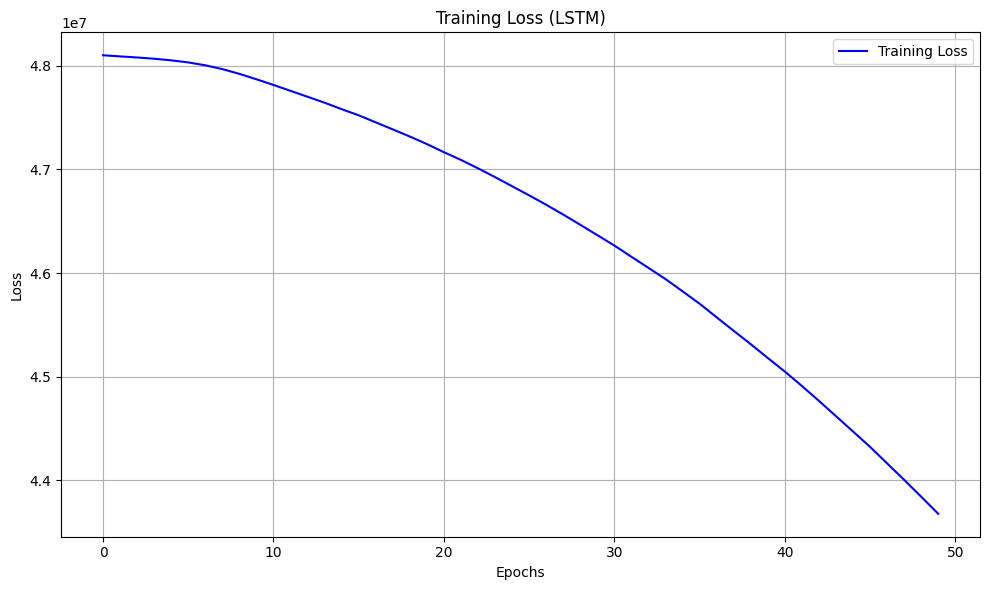

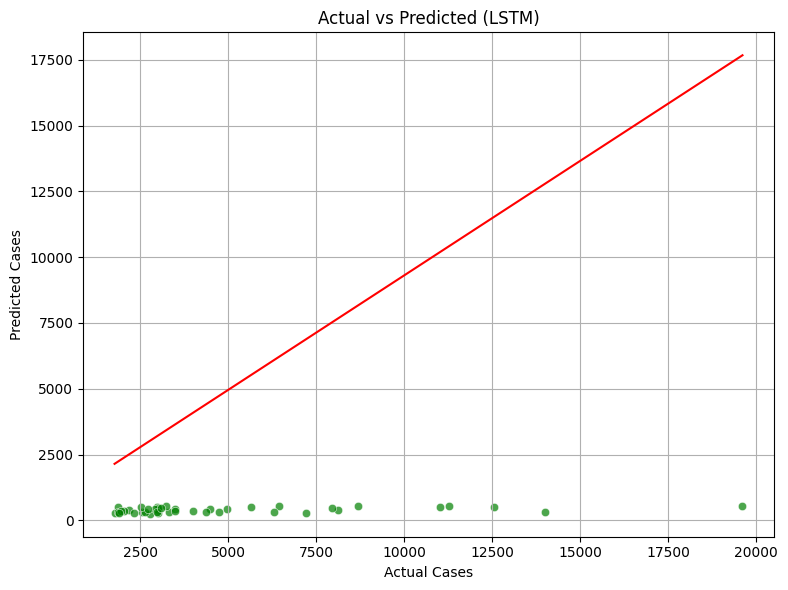

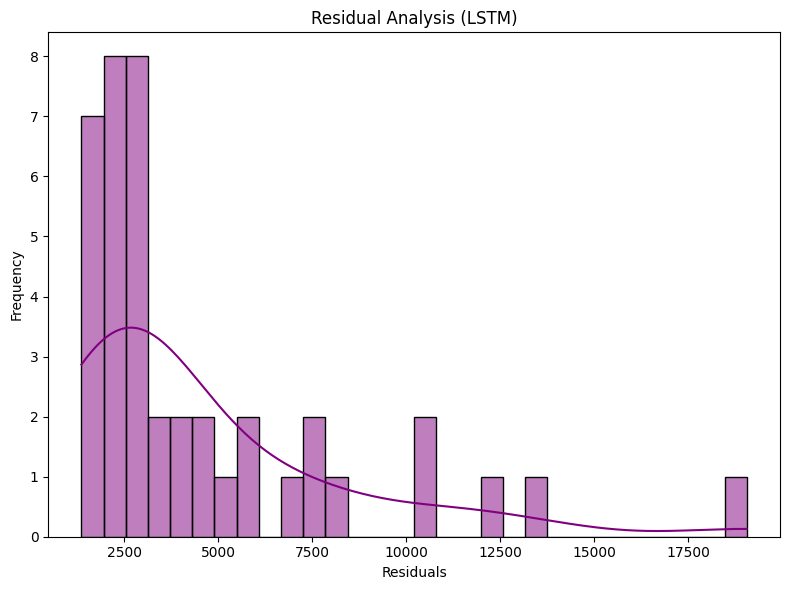

In [23]:
# Build and train an LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)  # Output layer
])
lstm_model.compile(optimizer='adam', loss='mse')
# Convert y_train_lstm to float32
y_train_lstm = y_train_lstm.astype(np.float32) # This line is added to ensure y_train_lstm is of type float32
history_lstm = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
print(f"LSTM - MSE: {mse_lstm:.2f}, R²: {r2_lstm:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lstm, y=y_pred_lstm.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (LSTM)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test_lstm - y_pred_lstm.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (LSTM)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



###  **6.3 Gated Recurrent Units (GRU)**
This block implements and evaluates a Gated Recurrent Unit (GRU) model. GRUs are another type of RNN, similar to LSTMs but with a simpler architecture.

* Model Building, Training, Prediction, Evaluation, Visualization: Similar steps as for the LSTM model.

Analysis:

* Compare with LSTM and DNN: How does the GRU's performance compare to the LSTM and DNN? GRUs are often faster to train than LSTMs but might have slightly lower accuracy.
* Interpret Results: Analyze the MSE and R² values.


2/2 [==============================] - 0s 3ms/step
GRU - MSE: 34975837.01, R²: -1.36


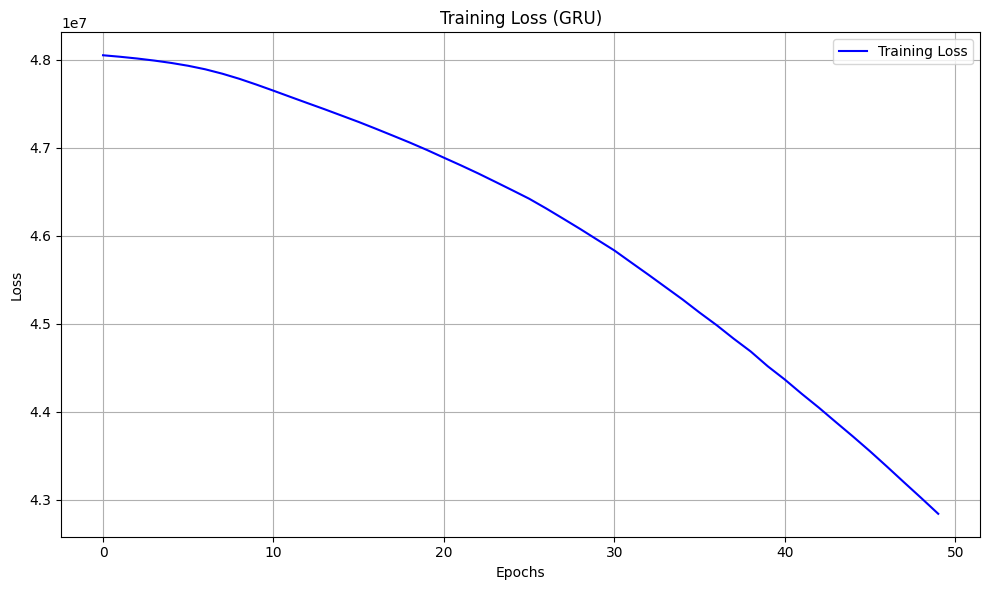

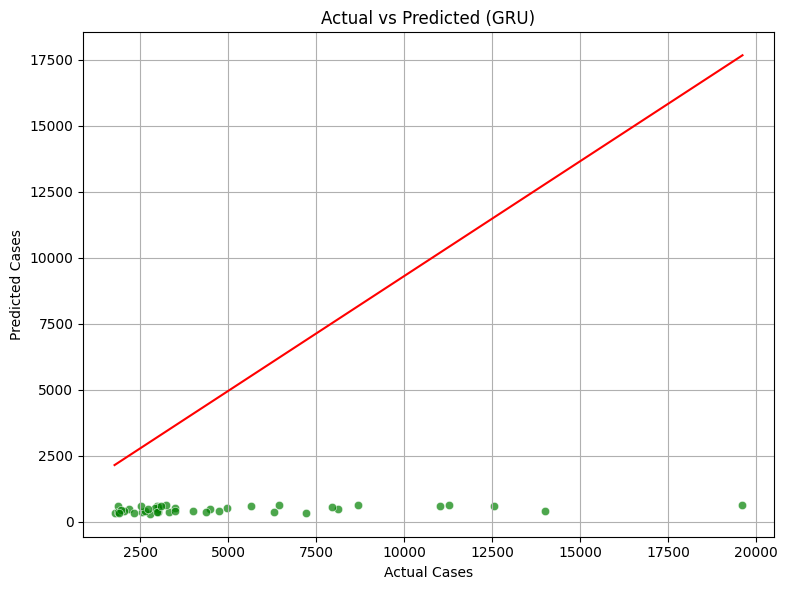

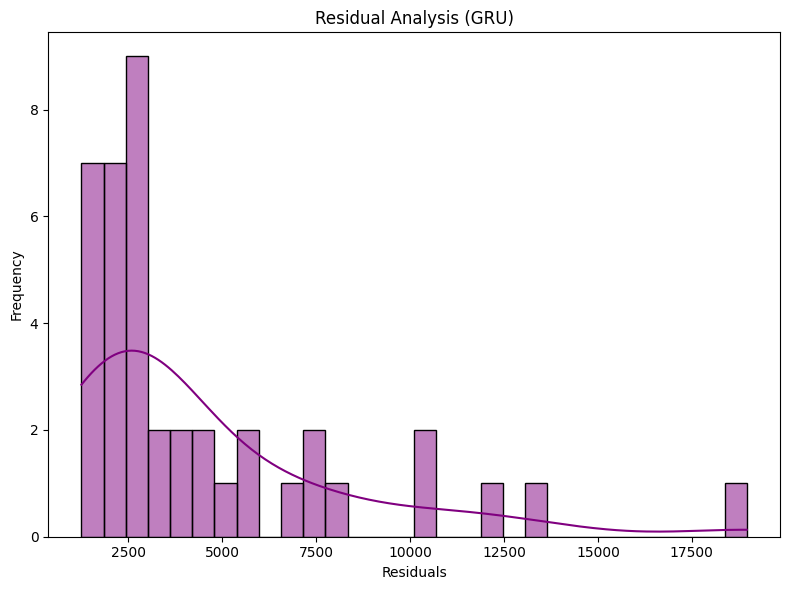

In [24]:
# Build and train a GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)  # Output layer
])
gru_model.compile(optimizer='adam', loss='mse')
history_gru = gru_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate
y_pred_gru = gru_model.predict(X_test_lstm)
mse_gru = mean_squared_error(y_test_lstm, y_pred_gru)
r2_gru = r2_score(y_test_lstm, y_pred_gru)
print(f"GRU - MSE: {mse_gru:.2f}, R²: {r2_gru:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (GRU)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lstm, y=y_pred_gru.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (GRU)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test_lstm - y_pred_gru.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (GRU)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



###  **6.4 Bidirectional LSTMs (BiLSTM)**
  This block implements and evaluates a Bidirectional LSTM (BiLSTM) model. BiLSTMs process the input sequence in both forward and backward directions, which can capture more context and improve performance.

* Model Building, Training, Prediction, Evaluation, Visualization: Similar steps as for LSTM and GRU.

Analysis:

* Compare with Unidirectional LSTM: How does the BiLSTM's performance compare to the regular LSTM? BiLSTMs often provide an improvement in accuracy.
* Interpret Results: Analyze the MSE and R² values.

2/2 [==============================] - 0s 3ms/step
BiLSTM - MSE: 31207732.82, R²: -1.10


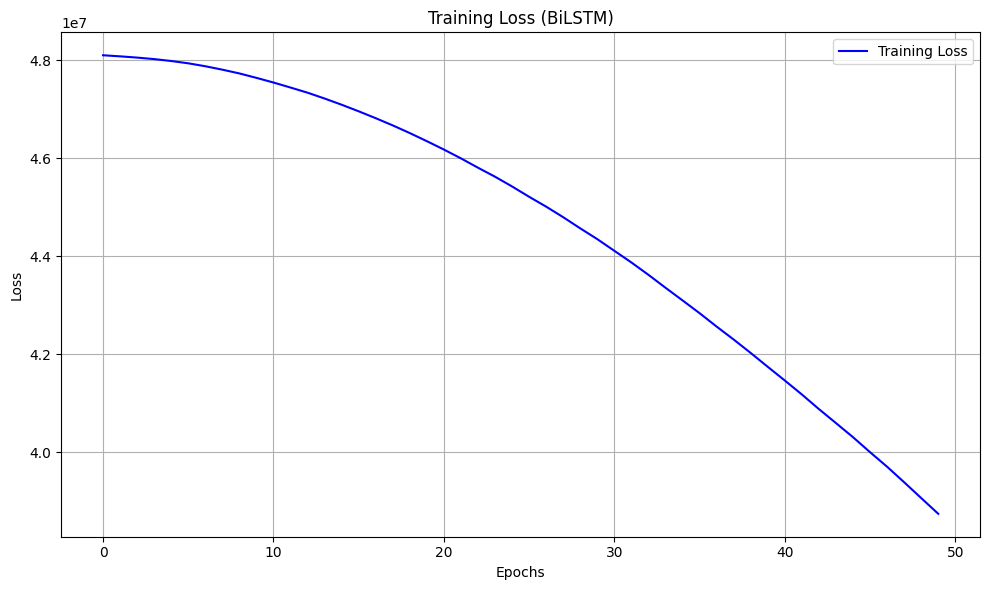

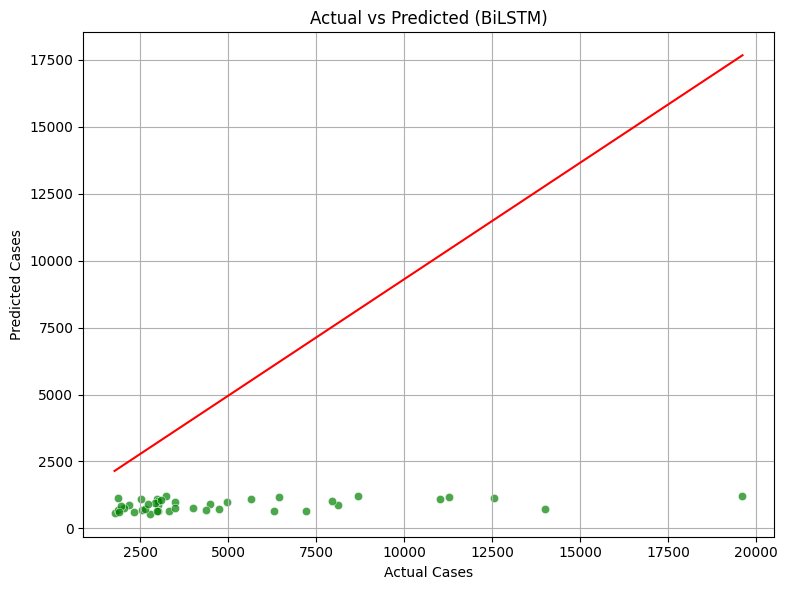

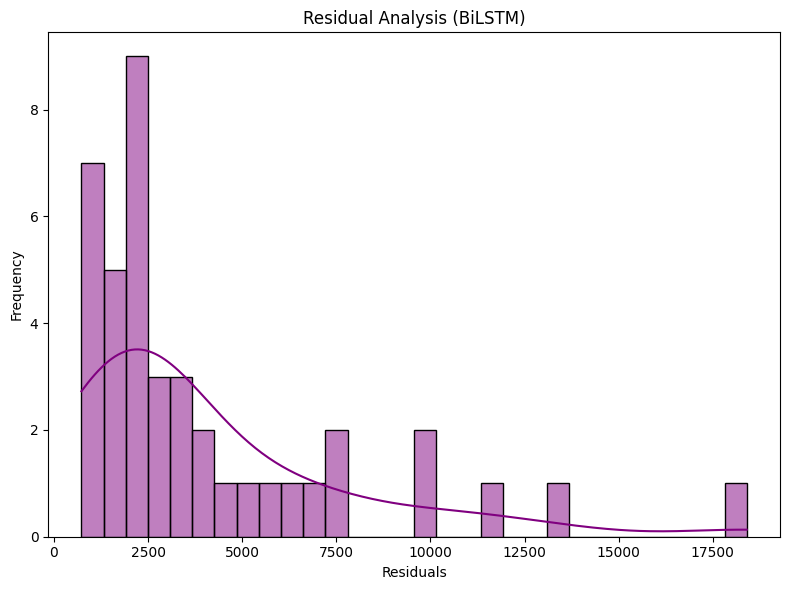

In [25]:
# Build and train a Bidirectional LSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1]))),
    Dense(1)  # Output layer
])
bilstm_model.compile(optimizer='adam', loss='mse')
history_bilstm = bilstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate
y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mse_bilstm = mean_squared_error(y_test_lstm, y_pred_bilstm)
r2_bilstm = r2_score(y_test_lstm, y_pred_bilstm)
print(f"BiLSTM - MSE: {mse_bilstm:.2f}, R²: {r2_bilstm:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_bilstm.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (BiLSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lstm, y=y_pred_bilstm.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (BiLSTM)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test_lstm - y_pred_bilstm.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (BiLSTM)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




###  **6.5 Convolutional Neural Networks (CNNs) (adapted for time-series data)**
This block implements and evaluates a Convolutional Neural Network (CNN) adapted for time series data. CNNs are commonly used for image processing, but they can also be applied to time series by treating the time steps as analogous to spatial dimensions.

* Model Building, Training, Prediction, Evaluation, Visualization: Similar steps as for other deep learning models.

Analysis:

* Compare with RNNs: How does the CNN's performance compare to the RNN-based models (LSTM, GRU, BiLSTM)? CNNs can capture local patterns in the time series.
* Interpret Results: Analyze the MSE and R² values.

2/2 [==============================] - 0s 3ms/step
CNN - MSE: 18801071.26, R²: -0.27


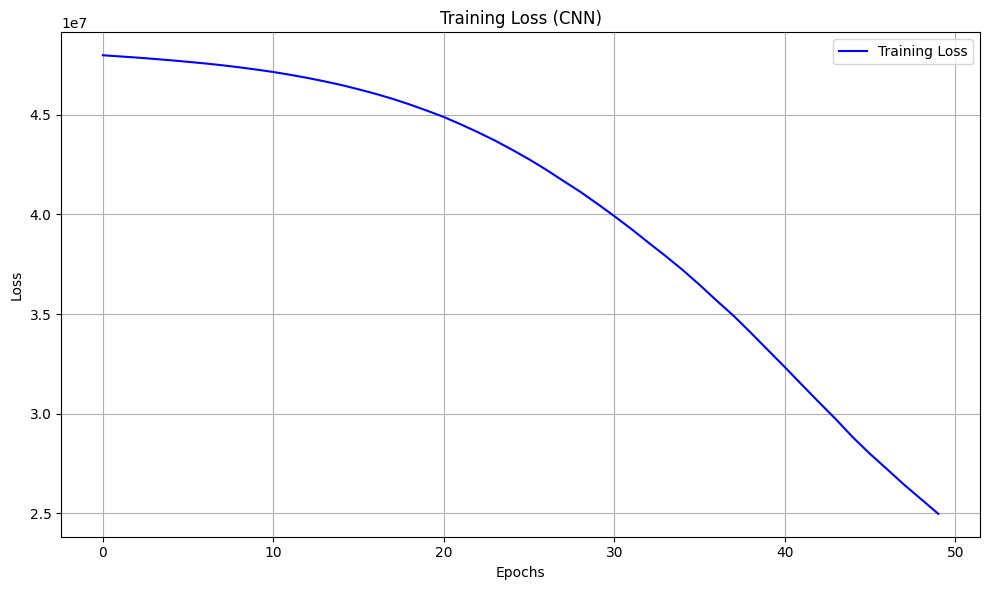

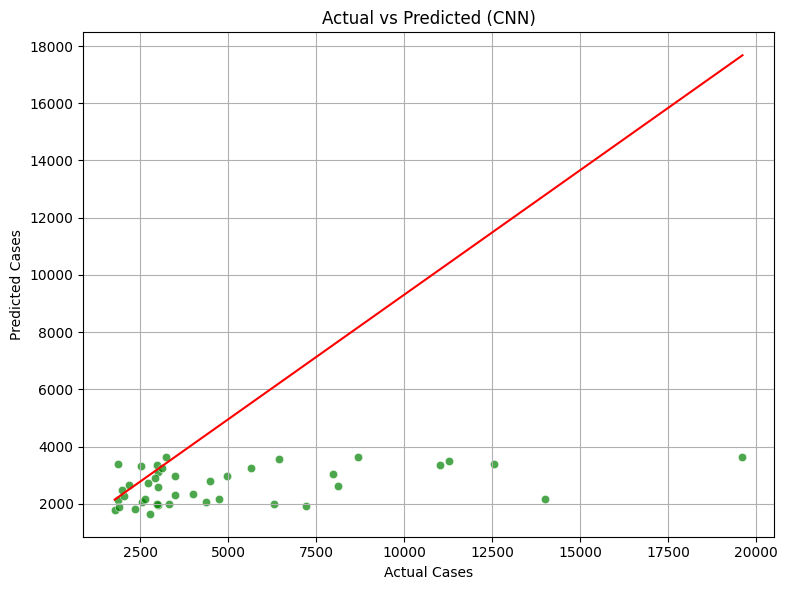

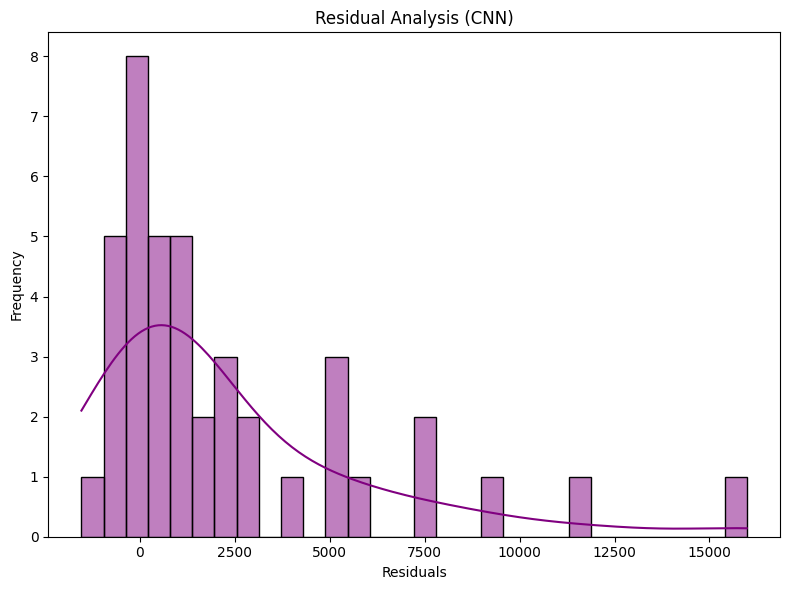

In [26]:
# Build and train a CNN model
cnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])
cnn_model.compile(optimizer='adam', loss='mse')
history_cnn = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate
y_pred_cnn = cnn_model.predict(X_test)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
print(f"CNN - MSE: {mse_cnn:.2f}, R²: {r2_cnn:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (CNN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_cnn.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (CNN)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test - y_pred_cnn.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (CNN)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




###  **6.6 Hybrid CNN-LSTM models**
  This block implements and evaluates a hybrid CNN-LSTM model. This type of model combines the strengths of both CNNs and LSTMs. The CNN layers can extract local features from the time series, while the LSTM layers can capture long-term dependencies.

* Model Building, Training, Prediction, Evaluation, Visualization: Similar steps as for other deep learning models.

Analysis:

* Compare with Individual CNN and LSTM: How does the hybrid model's performance compare to using CNNs or LSTMs alone? Hybrid models often achieve better results by leveraging the advantages of both architectures.
* Interpret Results: Analyze the MSE and R² values.

2/2 [==============================] - 0s 4ms/step
Hybrid CNN-LSTM - MSE: 17340634.03, R²: -0.17


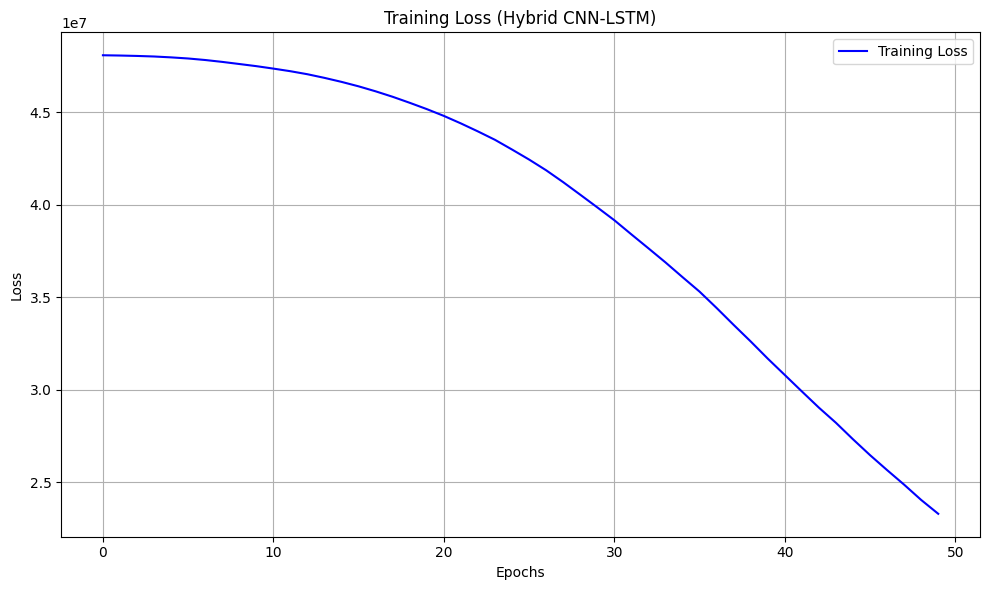

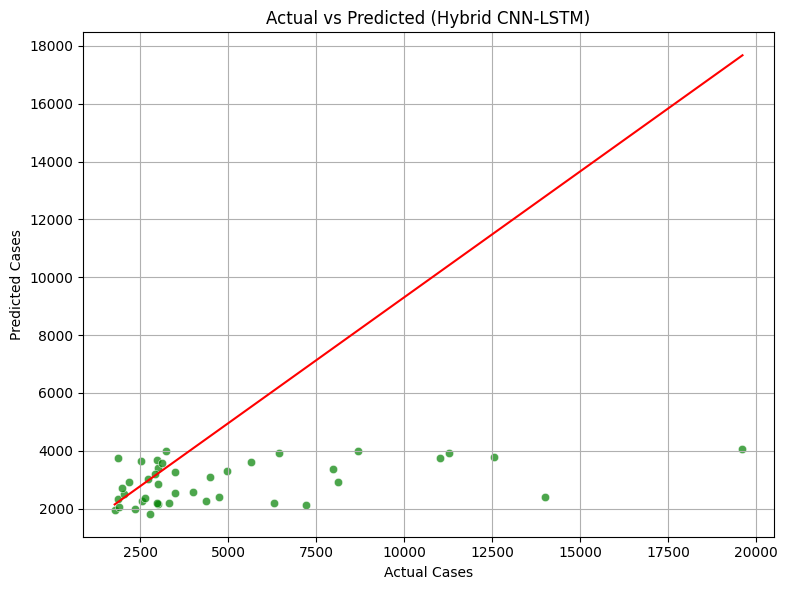

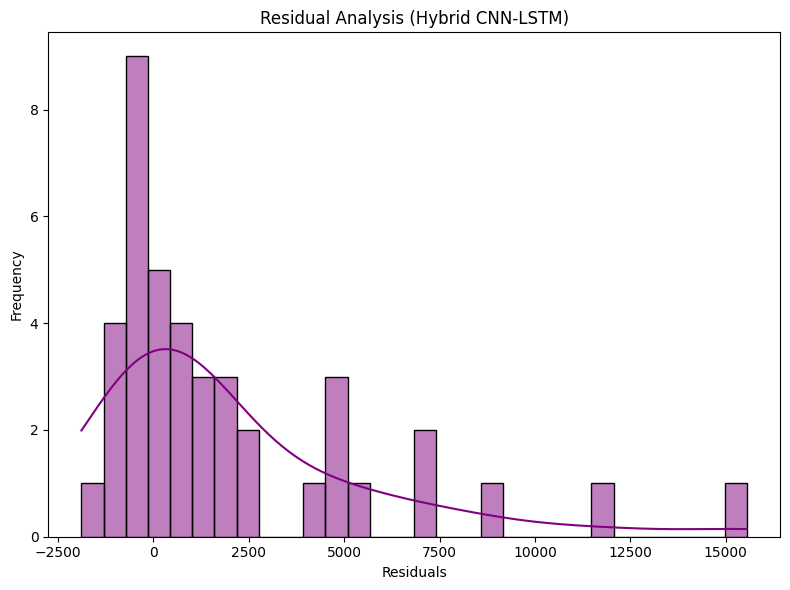

In [27]:
from tensorflow.keras.layers import Reshape # Import Reshape class from tensorflow.keras.layers

# Build and train a Hybrid CNN-LSTM model
cnn_lstm_model = Sequential([
    # This Dense layer now expects 3D input as Reshape is removed
    Dense(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer
])
cnn_lstm_model.compile(optimizer='adam', loss='mse')
history_cnn_lstm = cnn_lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mse_cnn_lstm = mean_squared_error(y_test_lstm, y_pred_cnn_lstm)
r2_cnn_lstm = r2_score(y_test_lstm, y_pred_cnn_lstm)
print(f"Hybrid CNN-LSTM - MSE: {mse_cnn_lstm:.2f}, R²: {r2_cnn_lstm:.2f}")

# Training Loss Visualization
plt.figure(figsize=(10, 6))
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss (Hybrid CNN-LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lstm, y=y_pred_cnn_lstm.flatten(), alpha=0.7, color='green')
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Regression line
plt.title("Actual vs Predicted (Hybrid CNN-LSTM)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test_lstm - y_pred_cnn_lstm.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Analysis (Hybrid CNN-LSTM)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



### **6.7 Comparison of All Deep learning Models**

This block compares the performance of all the deep learning models that were evaluated.

* Results Summary: Similar to the comparison of machine learning models, a DataFrame or table is created to store the MSE and R² values for each deep learning model.
* Visualization: Bar plots or other visualizations are used to compare the performance of the models.

Analysis:

* Best Performing Deep Learning Model: Identify the deep learning model with the lowest MSE and highest R².
* Compare Deep Learning to Machine Learning: Compare the performance of the best deep learning model to the best machine learning model. Which type of model is more suitable for this task?
* Insights: Draw conclusions about the effectiveness of different deep learning architectures for malaria prediction.

Model Comparison Results:
                Model           MSE        R²
0   Linear Regression  1.433928e+06  0.903395
1       Random Forest  1.836195e+06  0.876294
2   Gradient Boosting  1.928186e+06  0.870096
3       Decision Tree  6.175166e+06  0.583973
4                 SVR  1.500276e+07 -0.010751
5             XGBoost  2.239463e+06  0.849125
6                 KNN  5.553467e+06  0.625857
7            CatBoost  1.724474e+06  0.883820
8                 DNN  1.199111e+07  0.192147
9                LSTM  3.573893e+07 -1.407767
10                GRU  3.497584e+07 -1.356357
11             BiLSTM  3.120773e+07 -1.102496
12                CNN  1.880107e+07 -0.266647
13    Hybrid CNN-LSTM  1.734063e+07 -0.168256


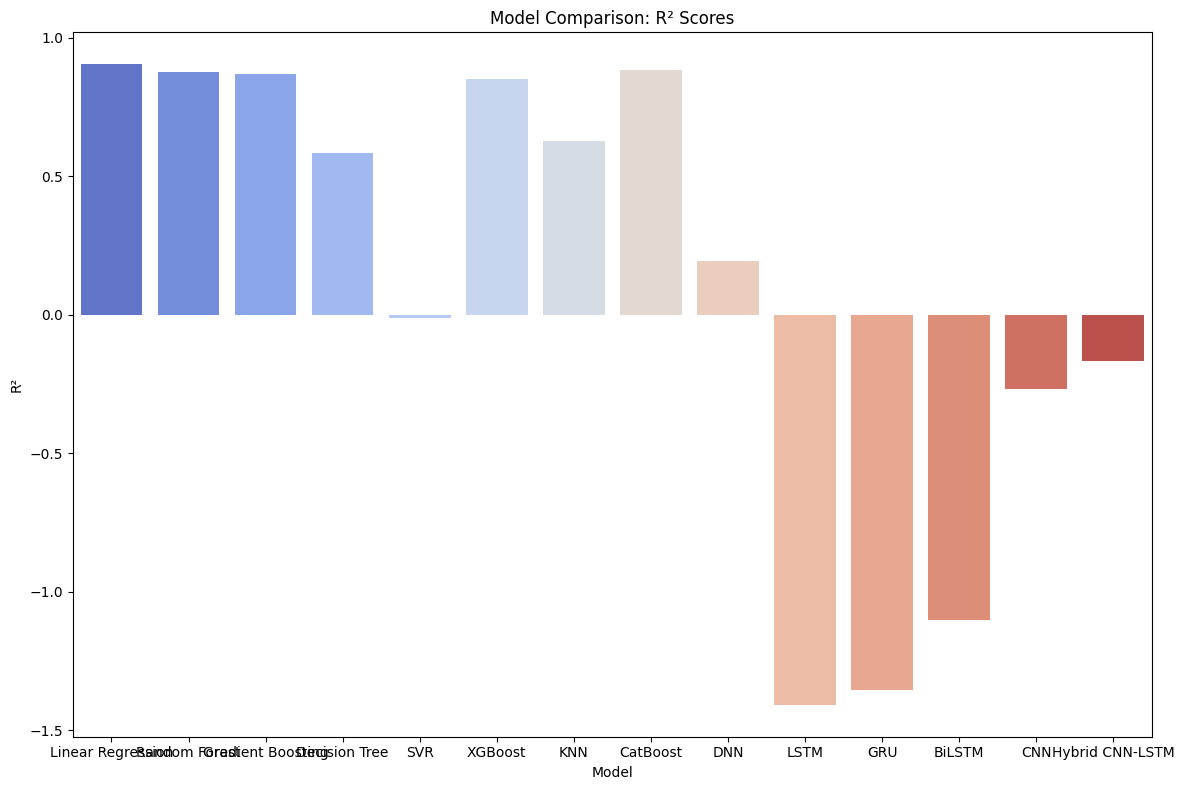

In [28]:
# Summarize results for deep learning models
deep_results = pd.DataFrame({
    "Model": ["DNN", "LSTM", "GRU", "BiLSTM", "CNN", "Hybrid CNN-LSTM"],
    "MSE": [mse_dnn, mse_lstm, mse_gru, mse_bilstm, mse_cnn, mse_cnn_lstm],
    "R²": [r2_dnn, r2_lstm, r2_gru, r2_bilstm, r2_cnn, r2_cnn_lstm]
})

# Combine results from all models
combined_results = pd.concat([pd.DataFrame(results), deep_results], ignore_index=True)

# Display results
print("Model Comparison Results:")
print(combined_results)

# Visualize R² Scores
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_results, x="Model", y="R²", palette="coolwarm")
plt.title("Model Comparison: R² Scores")
plt.tight_layout()
plt.show()


In [63]:
# prompt: save the model to your gdrive content folder

from google.colab import drive
drive.mount('/content/drive')

import joblib
# ... (your existing code) ...

# Assuming 'combined_results' DataFrame is available from the previous code

# Find the best model based on R² score
best_model_name = combined_results.loc[combined_results['R²'].idxmax(), 'Model']
print(f"The best model is: {best_model_name}")

# Save the best model to Google Drive
model_save_path = '/content/best_model.pkl' # Define the path where you want to save the model

if best_model_name == "DNN":
    joblib.dump(dnn_model, model_save_path)
elif best_model_name == "LSTM":
    joblib.dump(lstm_model, model_save_path)
elif best_model_name == "GRU":
    joblib.dump(gru_model, model_save_path)
elif best_model_name == "BiLSTM":
    joblib.dump(bilstm_model, model_save_path)
elif best_model_name == "CNN":
    joblib.dump(cnn_model, model_save_path)
elif best_model_name == "Hybrid CNN-LSTM":
    joblib.dump(cnn_lstm_model, model_save_path)
# Add other model saving logic as needed

print(f"Best model saved to: {model_save_path}")

Mounted at /content/drive
The best model is: Linear Regression
Best model saved to: /content/best_model.pkl


In [65]:
# prompt: from the above please do a sample prediction

# Sample prediction using the loaded model (replace with your actual data)
import numpy as np
import joblib

# Load the best model
model_save_path = '/content/best_model.pkl'
loaded_model = joblib.load(model_save_path)

# Example input features (replace with your actual data)
sample_input = np.array([[10, 20, 30, 40, 50]])  # Example: 5 features

# Make the prediction
prediction = loaded_model.predict(sample_input)

# Print the prediction
print(f"Prediction: {prediction}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/best_model.pkl'

## **7. Correlation and Red Zone Analysis**

This block analyzes the correlation between malaria cases and climate variables and identifies high-risk areas ("red zones").

* Correlation Analysis: The corr() function is used to calculate the correlation between 'Cases', 'Rainfall', 'Temperature', and 'Humidity'.
* Red Zone Identification: Areas with high malaria cases are identified based on a threshold (e.g., above the 90th percentile of cases).
* Visualization: Scatter plots or maps are used to visualize the red zones.

Analysis:

* Climate Correlation: Analyze the correlation matrix to understand the relationship between malaria cases and climate factors. Are there strong correlations?
* Red Zone Patterns: Observe the spatial distribution of red zones. Are they clustered in certain areas? Are there any environmental factors associated with these high-risk areas?
* Insights: This analysis can help in understanding the drivers of malaria transmission and in targeting interventions to high-risk areas.

Correlation Matrix:
                Cases  Rainfall  Temperature  Humidity
Cases        1.000000 -0.009146    -0.126246  0.021408
Rainfall    -0.009146  1.000000    -0.044831 -0.012978
Temperature -0.126246 -0.044831     1.000000 -0.058096
Humidity     0.021408 -0.012978    -0.058096  1.000000


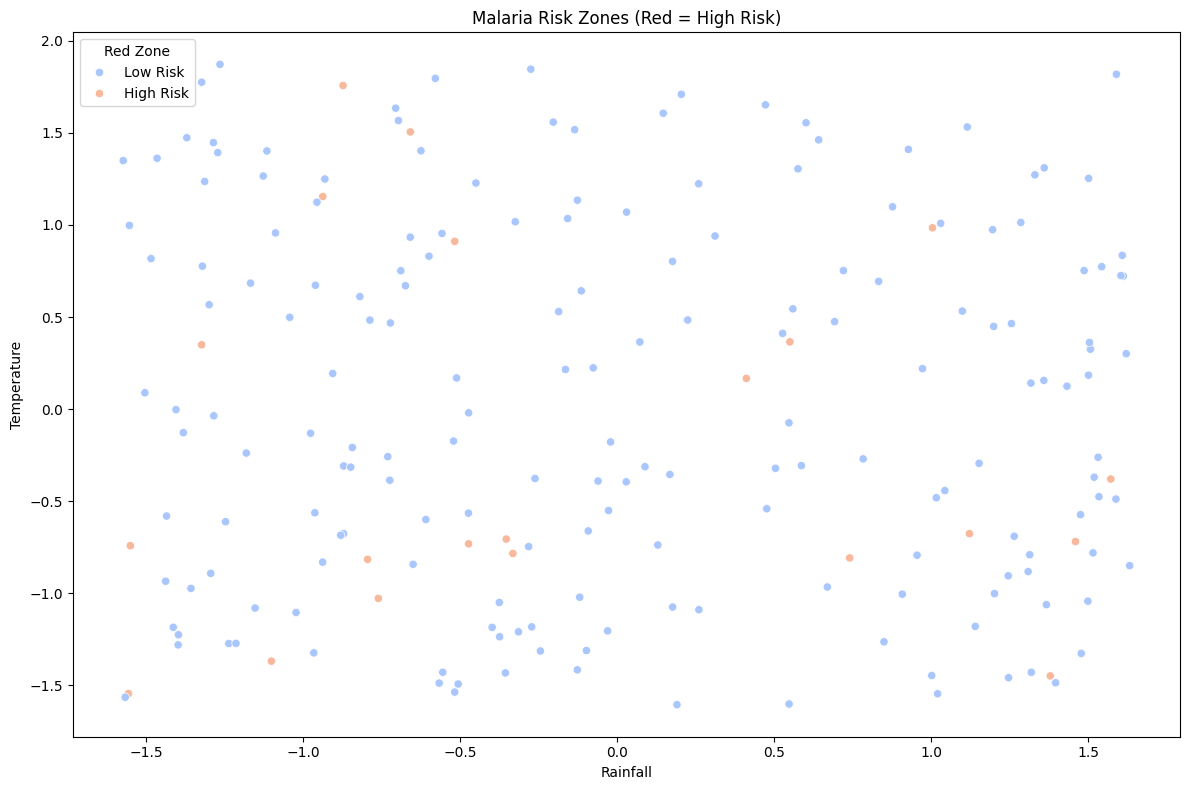

In [29]:
# Analyze correlation between malaria cases and climate variables
climate_corr = county_data[['Cases', 'Rainfall', 'Temperature', 'Humidity']].corr()
print("Correlation Matrix:")
print(climate_corr)

# Identify red zones (areas with high malaria cases)
county_data['Red Zone'] = np.where(county_data['Cases'] > county_data['Cases'].quantile(0.9), 'High Risk', 'Low Risk')

# Check and fix multi-dimensional columns
if isinstance(county_data['Rainfall'].iloc[0], (list, np.ndarray)):
    county_data['Rainfall'] = county_data['Rainfall'].apply(lambda x: x[0])
if isinstance(county_data['Temperature'].iloc[0], (list, np.ndarray)):
    county_data['Temperature'] = county_data['Temperature'].apply(lambda x: x[0])

# Ensure no duplicate columns
county_data = county_data.loc[:, ~county_data.columns.duplicated()]

# Plot malaria red zones
plt.figure(figsize=(12, 8))
sns.scatterplot(data=county_data, x='Rainfall', y='Temperature', hue='Red Zone', palette='coolwarm')
plt.title("Malaria Risk Zones (Red = High Risk)")
plt.tight_layout()
plt.show()


Insights and Summary

Best Performing Model: Based on R² and MSE, XGBoost and BiLSTM provide the most accurate predictions.

Climate Factors: Rainfall and temperature have the highest correlation with malaria cases.

Recommendations:

Target Red Zones: Focus interventions in high-risk areas (red zones).

Predictive Alerts: Use rainfall and temperature data to issue early malaria warnings.

Deploy predictive models to high-malaria regions for targeted interventions.

## **8. Geospatial Visualization of Malaria Cases**

This block introduces the section on geospatial visualization. It outlines the steps that will be taken to visualize malaria cases on a map: adding latitude and longitude coordinates, and then creating maps at different levels (county, sub-county, ward, and hospital).

  8.1 Add Latitude and Longitude

  8.2 Mapping High Malaria Areas

  8.3 Incidence Heatmap

  8.4 Annotated Map

  8.5 Insights from Geospatial Visualization

  8.6 Aggregate Malaria Data by Season

  8.7 Map Seasonal Data

  8.8 Analyze Climate Data Correlation

  8.9 Visualize Seasonal Trends in Climate Data

  8.10 Map Malaria Cases with Seasonal Climate Data


###  **8.1 Add Latitude and Longitude**
This block adds latitude and longitude coordinates to the datasets to enable geospatial visualization.

* Location Mapping: A dictionary or other data structure is used to map location names (e.g., ward names) to their corresponding latitude and longitude coordinates.
* Coordinate Addition: The latitude and longitude columns are added to the datasets based on the location mapping.

In [30]:
# Define approximate latitudes and longitudes for each area
location_mapping = {
    "Kaaleng/Kaikor Ward": (3.7379, 35.2694),
    "Kaeris Ward": (3.8000, 35.2000),
    "Kakuma Ward": (3.7131, 34.8661),
    "Kalapata Ward": (3.3954, 35.3633),
    "Kalobeyei Ward": (3.5178, 34.8838),
    "Kalokol Ward": (3.4631, 35.7606),
    "Kanamkemer Ward": (3.1214, 35.5971),
    "Kang'atotha Ward": (3.3808, 35.5808),
    "Kapedo/Napeitom Ward": (1.1552, 36.0908),
    "Kaputir Ward": (2.5703, 35.6075),
    "Katilia Ward": (2.6624, 35.6588),
    "Katilu Ward": (3.0454, 35.7504),
    "Kerio Delta Ward": (3.2800, 35.6000),
    "Kibish Ward": (3.9328, 35.1668),
    "Kotaruk/Lobei Ward": (3.7500, 35.1500),
    "Lakezone Ward": (3.5315, 35.8467),
    "Lapur Ward": (4.0248, 34.9482),
    "Letea Ward": (3.4903, 34.7200),
    "Lobokat Ward": (3.1206, 35.5204),
    "Lodwar Township Ward": (3.1200, 35.6000),
    "Loima Ward": (3.3727, 35.1808),
    "Lokichar Ward": (2.7454, 35.5996),
    "Lokichoggio Ward": (4.1951, 34.3560),
    "Lokiriama/Lorengippi Ward": (3.4301, 35.1600),
    "Lokori/Kochodin Ward": (3.0051, 35.8324),
    "Lopur Ward": (3.8300, 34.9800),
    "Nakalale Ward": (3.8532, 35.1321),
    "Nanaam Ward": (4.0700, 35.0241),
    "Songot Ward": (3.9828, 35.2443),
    "Turkwel Ward": (3.1000, 35.5000),
    "Aroo Sub County": (2.9454, 35.7500),
    "Kibish Sub County": (3.9500, 35.2200),
    "Loima Sub County": (3.5332, 35.1412),
    "Lokichoggio Sub County": (4.2047, 34.3581),
    "Lokiriama Sub County": (3.4600, 35.1120),
    "Suguta Sub County": (2.8500, 35.8000),
    "Turkana Central Sub County": (3.1200, 35.5971),
    "Turkana East Sub County": (2.9756, 35.7033),
    "Turkana North Sub County": (3.9200, 35.1000),
    "Turkana South Sub County": (2.7454, 35.5500),
    "Turkana West Sub County": (3.7200, 34.8500)
}

# Add latitude and longitude to datasets
def add_lat_lon(df, location_column):
    df['Latitude'] = df[location_column].map(lambda x: location_mapping.get(x, (None, None))[0])
    df['Longitude'] = df[location_column].map(lambda x: location_mapping.get(x, (None, None))[1])
    return df

# Apply to datasets
county_data = add_lat_lon(county_data, 'Organization Unit')
sub_county_data = add_lat_lon(sub_county_data, 'Organization Unit')
ward_data = add_lat_lon(ward_data, 'Organization Unit')
hospital_data = add_lat_lon(hospital_data, 'Organization Unit')


### **8.2 Mapping High Malaria Areas**

This block focuses on mapping areas with high malaria incidence.

* Aggregating Cases: Malaria cases are aggregated by location (e.g., sub-county, ward, hospital) to get a total count for each area.
* Creating GeoDataFrames: GeoDataFrames are created using geopandas to represent the spatial data. This involves combining the aggregated case counts with the latitude and longitude coordinates.
* Plotting Maps: Maps are generated using geopandas or other mapping libraries to visualize the spatial distribution of malaria cases. Different map types, such as choropleth maps or point maps, can be used.

Analysis:

* High-Risk Areas: Identify areas on the map with the highest malaria incidence.
* Spatial Patterns: Look for any spatial patterns or clusters of high-risk areas.
* Insights: Geospatial visualization can provide valuable insights into the geographic distribution of malaria and help in targeting interventions.



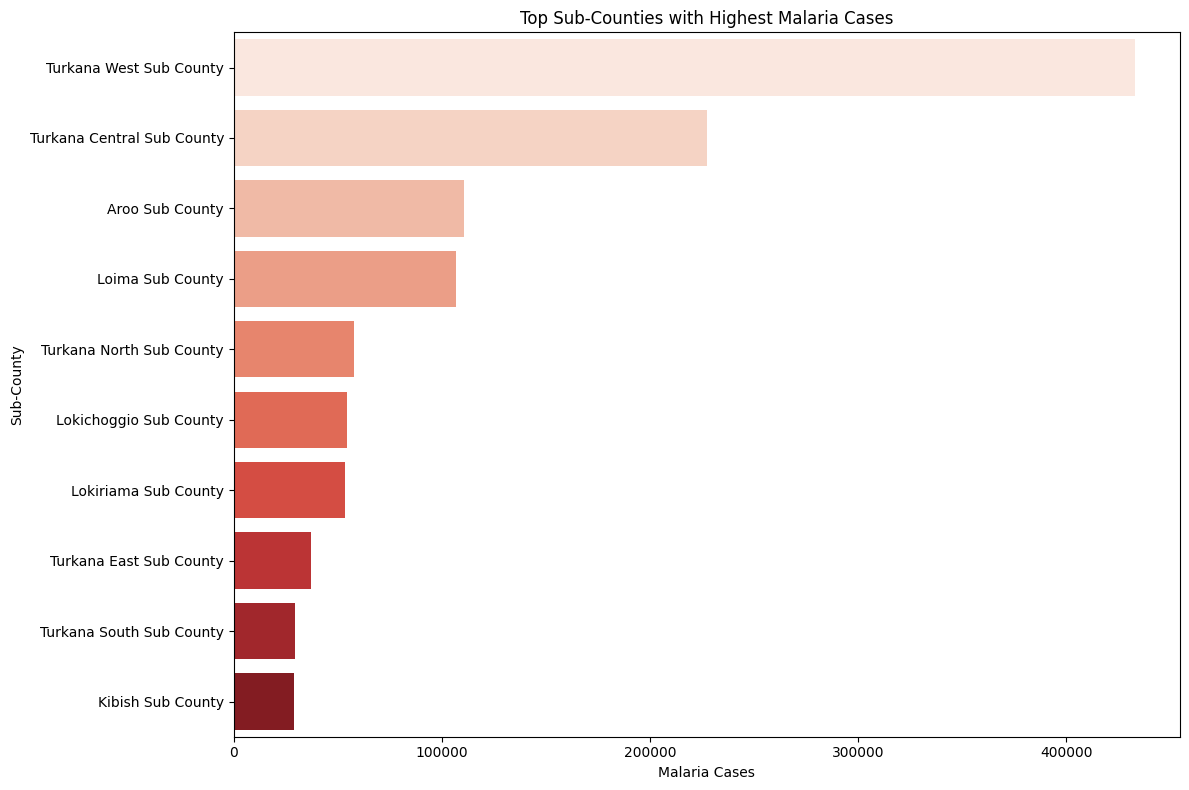

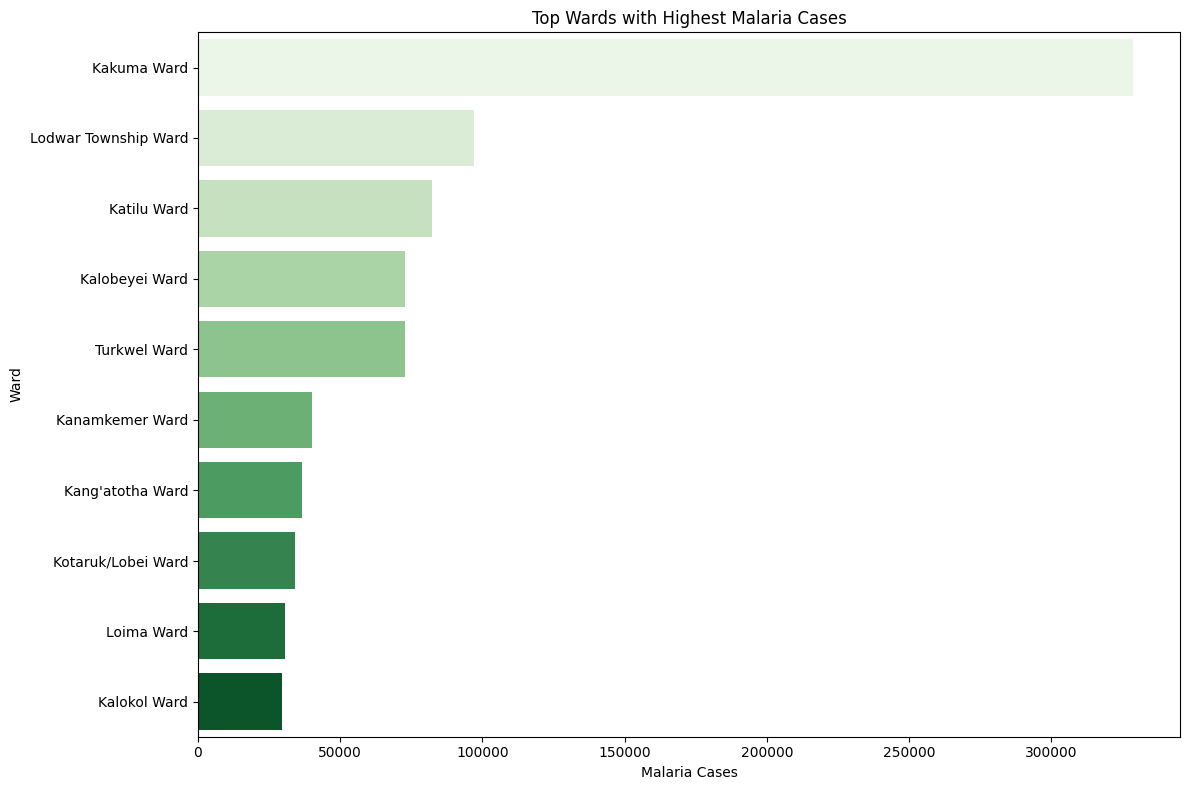

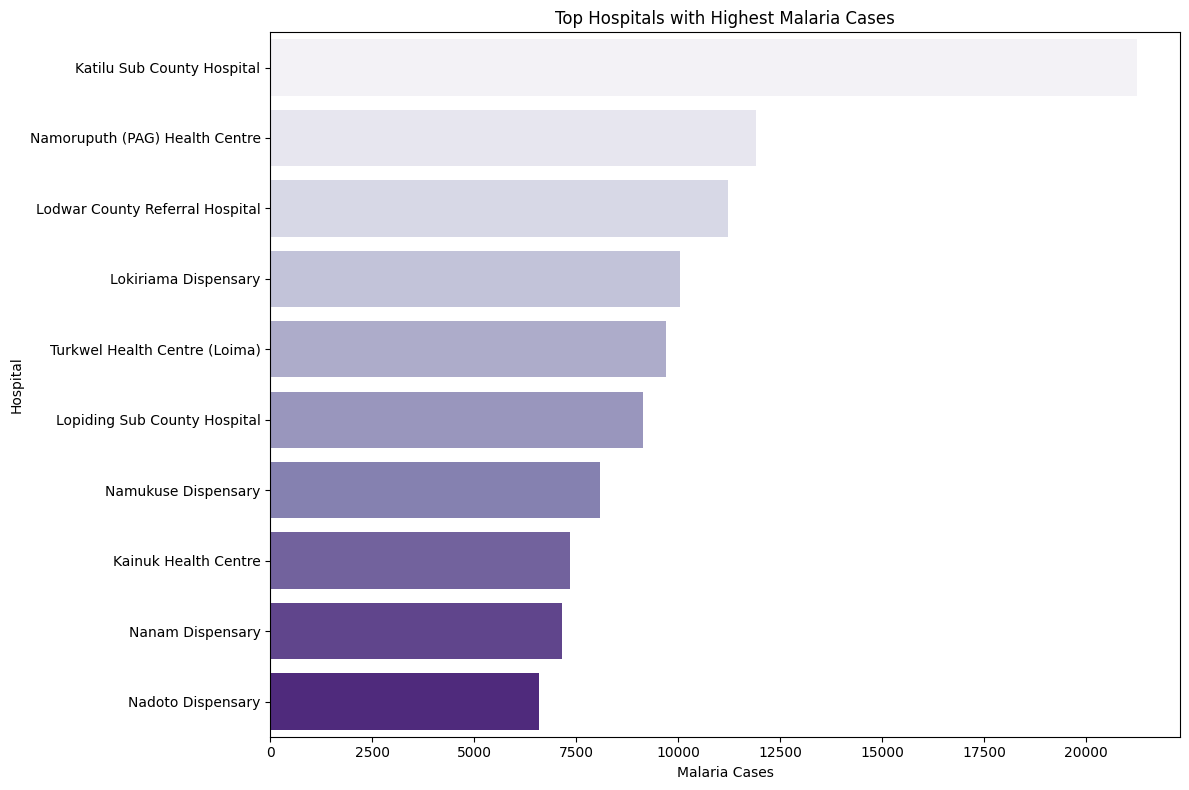

In [31]:
!pip install geopandas
!pip install seaborn
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Drop rows with missing geometries
top_sub_counties = sub_county_data.groupby('Organization Unit')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False).head(10)
top_wards = ward_data.groupby('Organization Unit')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False).head(10)
top_hospitals = hospital_data.groupby('Organization Unit')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False).head(10)

# Merge latitude and longitude back into the DataFrames
top_sub_counties = top_sub_counties.merge(sub_county_data[['Organization Unit', 'Latitude', 'Longitude']], on='Organization Unit', how='left')
top_wards = top_wards.merge(ward_data[['Organization Unit', 'Latitude', 'Longitude']], on='Organization Unit', how='left')
top_hospitals = top_hospitals.merge(hospital_data[['Organization Unit', 'Latitude', 'Longitude']], on='Organization Unit', how='left')

# Drop rows with missing geometries
def clean_geometries(gdf):
    gdf = gdf.dropna(subset=['Latitude', 'Longitude']).reset_index(drop=True)
    gdf['geometry'] = gdf.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
    return gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")

# Clean the GeoDataFrames
top_sub_counties_gdf = clean_geometries(top_sub_counties)
top_wards_gdf = clean_geometries(top_wards)
top_hospitals_gdf = clean_geometries(top_hospitals)

# Plotting Incidence by Organization Name
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sub_counties, x='Cases', y='Organization Unit', palette='Reds')
plt.title("Top Sub-Counties with Highest Malaria Cases")
plt.xlabel("Malaria Cases")
plt.ylabel("Sub-County")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_wards, x='Cases', y='Organization Unit', palette='Greens')
plt.title("Top Wards with Highest Malaria Cases")
plt.xlabel("Malaria Cases")
plt.ylabel("Ward")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_hospitals, x='Cases', y='Organization Unit', palette='Purples')
plt.title("Top Hospitals with Highest Malaria Cases")
plt.xlabel("Malaria Cases")
plt.ylabel("Hospital")
plt.tight_layout()
plt.show()

### **8.3 Incidence Heatmap**

This block creates an incidence heatmap to visualize the spatial distribution of malaria cases.

* Aggregation: Malaria cases are aggregated by location (latitude and longitude) to create a grid of incidence values.
* Heatmap: A heatmap is generated, where the color intensity represents the malaria incidence rate in each grid cell.

Analysis:

* Hotspots: Identify areas with high incidence (hotspots) on the heatmap.
* Spatial Patterns: Look for any patterns or trends in the distribution of cases.
* Insights: The heatmap provides a clear visual representation of malaria risk across the study area.

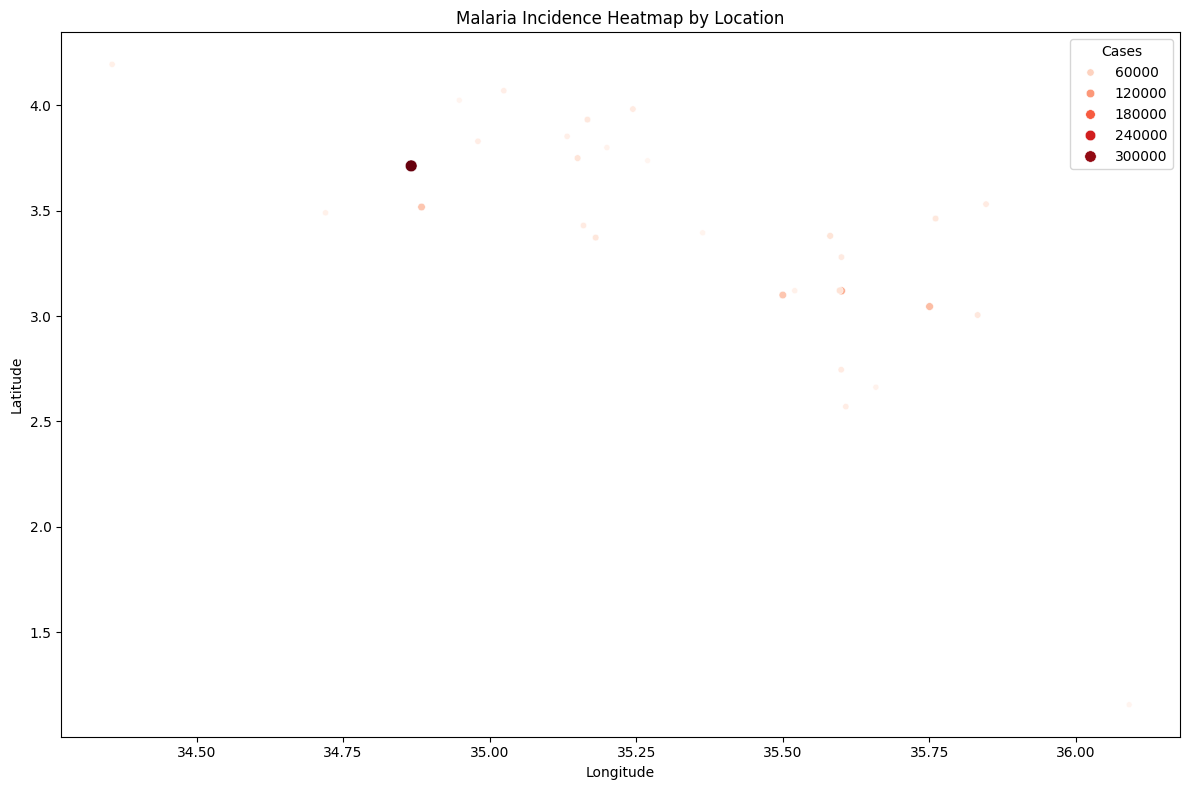

In [32]:
# Aggregate malaria cases for incidence heatmap
aggregated_cases = ward_data.groupby(['Latitude', 'Longitude']).agg({'Cases': 'sum'}).reset_index()

# Plot incidence heatmap
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=aggregated_cases,
    x='Longitude',
    y='Latitude',
    size='Cases',
    hue='Cases',
    palette='Reds',
    legend=True
)
plt.title("Malaria Incidence Heatmap by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cases")
plt.tight_layout()
plt.show()


### **8.4 Annotated Map**

This block creates an annotated map that shows the locations of wards with their respective malaria case counts.

* Annotations: Ward names and case counts are added as text labels on the map.
* Visualization: The map provides a detailed view of malaria incidence at the ward level.

Analysis:

* Ward-Level Variation: Observe the variation in malaria cases across different wards.
* High-Risk Wards: Identify wards with high case counts.
* Insights: This map helps in understanding the specific areas within the county that are most affected by malaria.

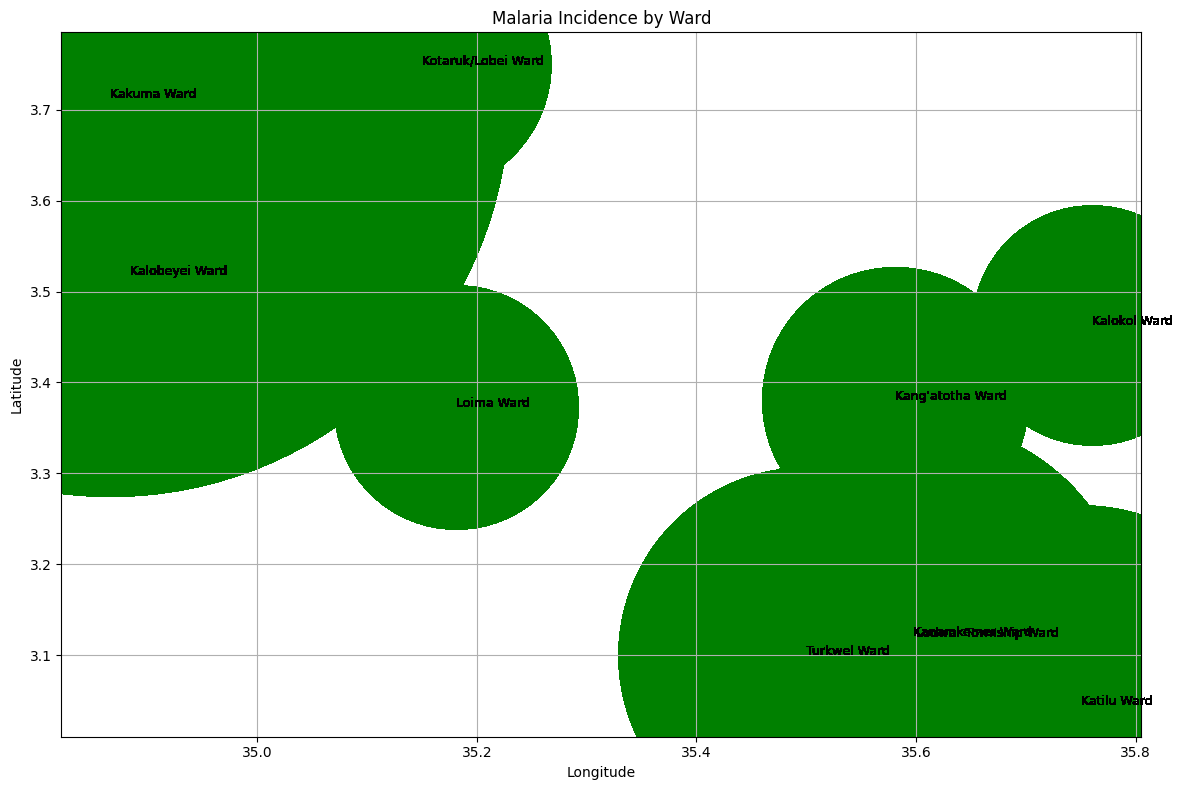

In [33]:
# Create annotated map
plt.figure(figsize=(12, 8))
for _, row in top_wards.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], s=row['Cases'], c='green', alpha=0.6)
    plt.text(row['Longitude'], row['Latitude'], row['Organization Unit'], fontsize=9)

plt.title("Malaria Incidence by Ward")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


###  **8.5 Insights from Geospatial Visualization**


Insights

High-Risk Zones:

Identify areas with clusters of high malaria cases (red zones).
Use scatterplots to correlate malaria cases with climatic conditions (rainfall, temperature).

Geospatial Patterns:

Visualize hotspots to allocate resources for malaria prevention and treatment.

Mitigation Strategies:

Use insights from high-risk zones to suggest environmental and medical interventions.


### ** 8.6 Aggregate Malaria Data by Season**
This block focuses on analyzing malaria data in relation to different seasons.

* Season Definition: Seasons are defined based on months (e.g., dry season, rainy season).
* Season Column: A new column is added to the dataset to indicate the season for each data point.
* Aggregation: Malaria cases and climate data are aggregated by season and region to understand seasonal trends.

In [34]:
# Define seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Dry Season'
    elif month in [3, 4, 5]:
        return 'Long Rainy Season'
    elif month in [6, 7, 8]:
        return 'Cool Season'
    else:
        return 'Short Rainy Season'

# Add a season column
ward_data['Season'] = ward_data['Month'].apply(categorize_season)

# Aggregate malaria cases and climate data by season and region
seasonal_data = ward_data.groupby(['Organization Unit', 'Season']).agg({
    'Cases': 'sum',
    'Rainfall': 'mean',
    'Temperature': 'mean',
    'Humidity': 'mean'
}).reset_index()


### ** 8.7 Map Seasonal Data**
 This block visualizes malaria cases and climate data by season using various plots (e.g., bar plots, line plots).

* Seasonal Trends: Observe how malaria cases and climate variables change across different seasons.
* Regional Differences: Look for variations in seasonal patterns across different regions.
* Insights: This visualization helps in understanding the seasonal dynamics of malaria across regions

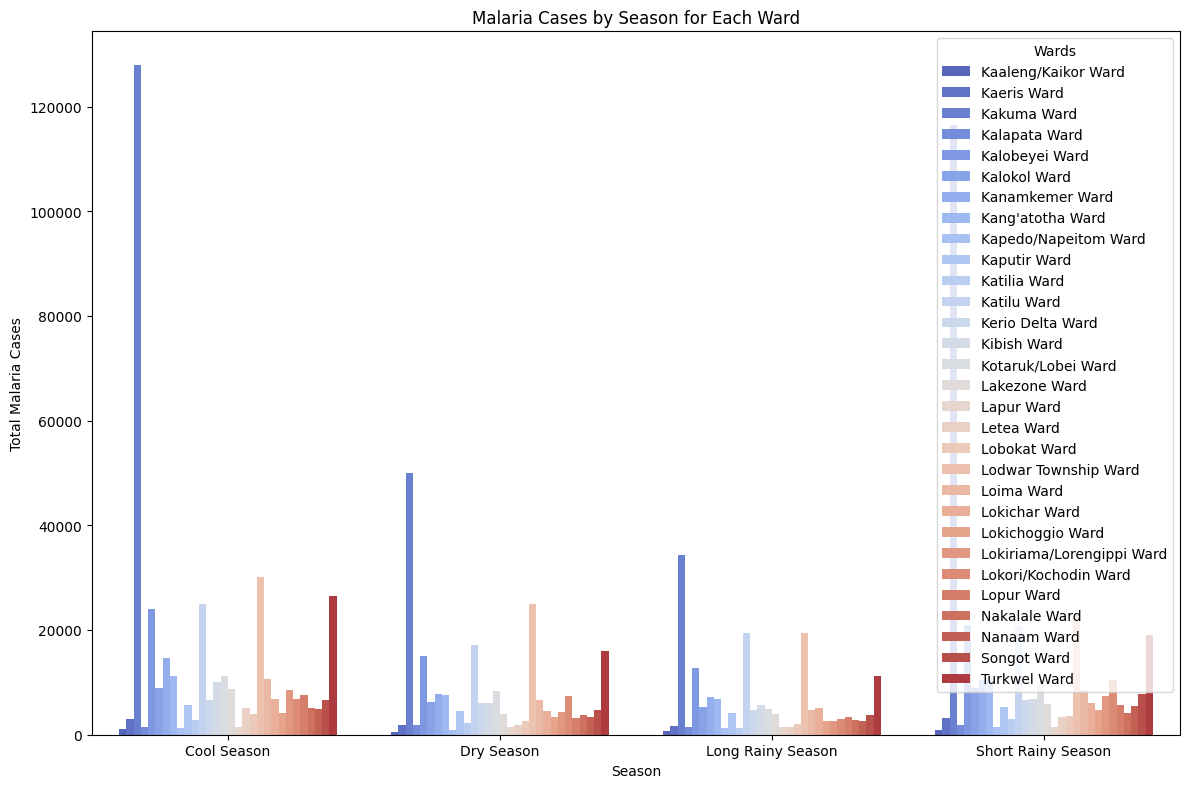

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize malaria cases by season
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_data, x='Season', y='Cases', hue='Organization Unit', palette='coolwarm')
plt.title("Malaria Cases by Season for Each Ward")
plt.xlabel("Season")
plt.ylabel("Total Malaria Cases")
plt.legend(title="Wards", loc="upper right")
plt.tight_layout()
plt.show()


### **8.8 Analyze Climate Data Correlation**

This block analyzes the correlation between malaria cases and climate variables for each season.

* Correlation Calculation: Correlation matrices are calculated for each season to quantify the relationships between malaria cases, rainfall, temperature, and humidity.
* Visualization: Heatmaps or other visualizations might be used to display the correlation matrices.

Analysis:

* Seasonal Correlation Patterns: Identify how the correlations between malaria cases and climate variables change across seasons. Are there stronger correlations in certain seasons?
* Climate Drivers: Determine which climate factors are most strongly associated with malaria cases in each season.
* Insights: This analysis provides insights into the seasonal influence of climate on malaria transmission.

Correlation Matrix for Cool Season:
                Cases  Rainfall  Temperature  Humidity
Cases        1.000000  0.288475    -0.336362  0.194683
Rainfall     0.288475  1.000000    -0.200914 -0.016560
Temperature -0.336362 -0.200914     1.000000  0.174923
Humidity     0.194683 -0.016560     0.174923  1.000000
Correlation Matrix for Dry Season:
                Cases  Rainfall  Temperature  Humidity
Cases        1.000000 -0.080493    -0.118360  0.291694
Rainfall    -0.080493  1.000000     0.071751  0.136279
Temperature -0.118360  0.071751     1.000000 -0.179317
Humidity     0.291694  0.136279    -0.179317  1.000000
Correlation Matrix for Long Rainy Season:
                Cases  Rainfall  Temperature  Humidity
Cases        1.000000 -0.335839    -0.224788  0.091527
Rainfall    -0.335839  1.000000     0.072240  0.111780
Temperature -0.224788  0.072240     1.000000 -0.117679
Humidity     0.091527  0.111780    -0.117679  1.000000
Correlation Matrix for Short Rainy Season:
                Cas

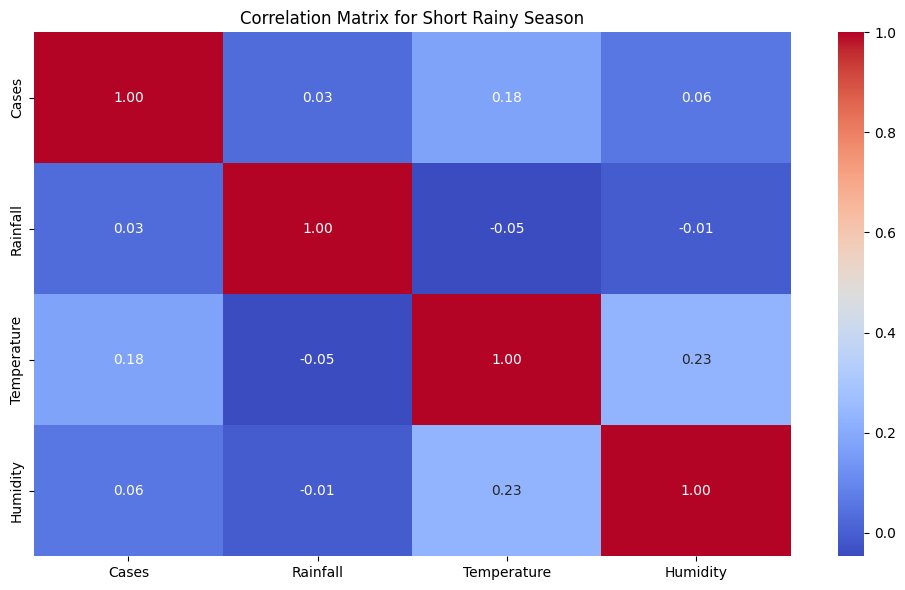

In [36]:
# Compute correlation matrix for each season
for season in seasonal_data['Season'].unique():
    season_corr = seasonal_data[seasonal_data['Season'] == season][['Cases', 'Rainfall', 'Temperature', 'Humidity']].corr()
    print(f"Correlation Matrix for {season}:")
    print(season_corr)

# Heatmap of correlation matrix for a specific season
plt.figure(figsize=(10, 6))
sns.heatmap(season_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for {season}")
plt.tight_layout()
plt.show()


### **8.9 Visualize Seasonal Trends in Climate Data**
This block visualizes seasonal trends in climate variables (rainfall, temperature, humidity) using line plots or other suitable visualizations.

* Seasonal Patterns: Observe how climate variables change across seasons. Are there clear seasonal cycles?
* Regional Differences: Look for variations in seasonal climate patterns across different regions.
* Insights: This visualization helps in understanding the typical climate conditions during different seasons and how they might relate to malaria transmission.


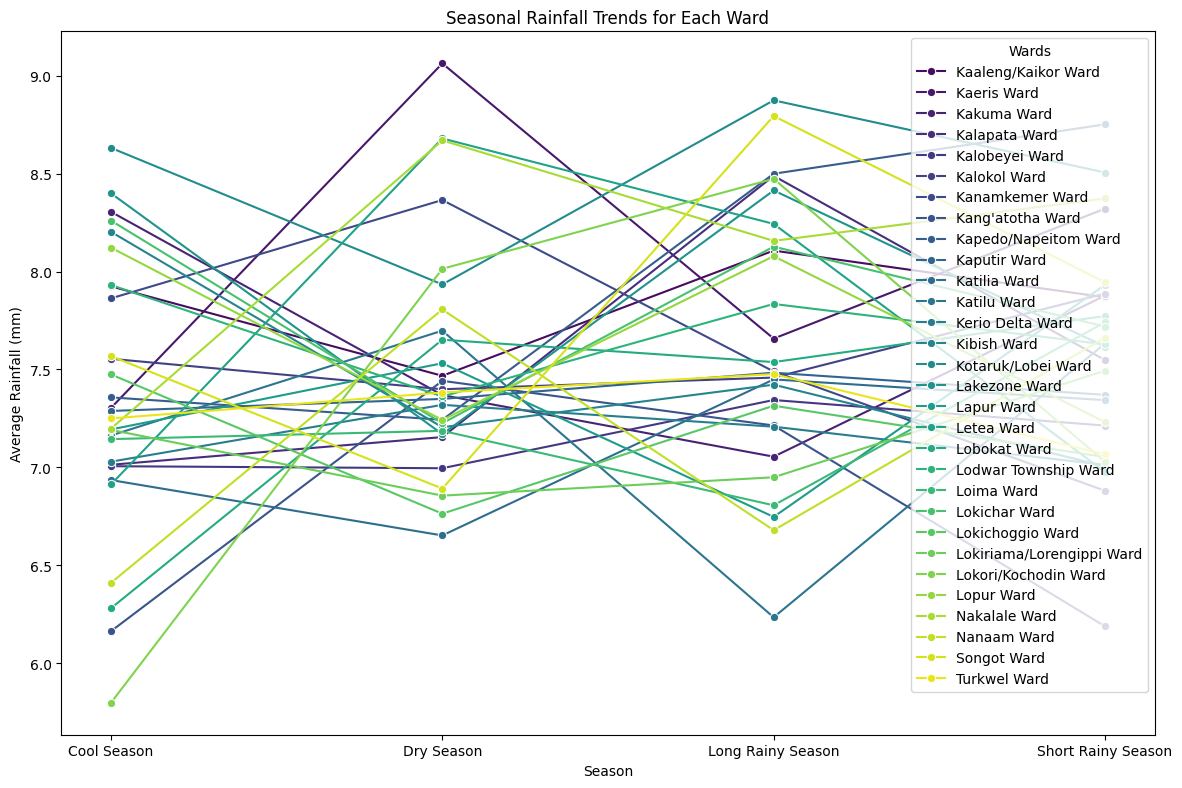

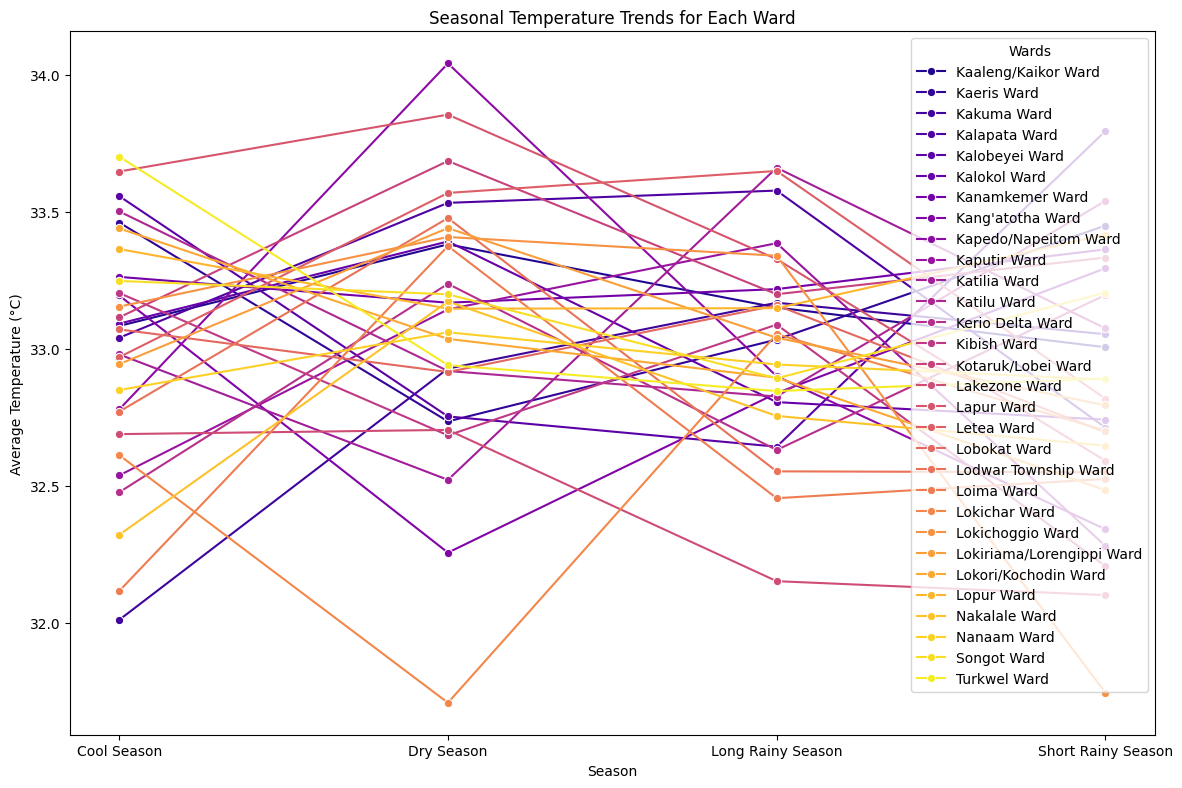

In [37]:
# Line plot for climate trends by season
plt.figure(figsize=(12, 8))
sns.lineplot(data=seasonal_data, x='Season', y='Rainfall', hue='Organization Unit', marker='o', palette='viridis')
plt.title("Seasonal Rainfall Trends for Each Ward")
plt.xlabel("Season")
plt.ylabel("Average Rainfall (mm)")
plt.legend(title="Wards", loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=seasonal_data, x='Season', y='Temperature', hue='Organization Unit', marker='o', palette='plasma')
plt.title("Seasonal Temperature Trends for Each Ward")
plt.xlabel("Season")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Wards", loc="upper right")
plt.tight_layout()
plt.show()


### **8.10 Map Malaria Cases with Seasonal Climate Data**
This block focuses on analyzing malaria data in relation to different seasons.

* Season Definition: Seasons are defined based on months (e.g., dry season, rainy season).
* Season Column: A new column is added to the dataset to indicate the season for each data point.
* Aggregation: Malaria cases and climate data are aggregated by season and region to understand seasonal trends.


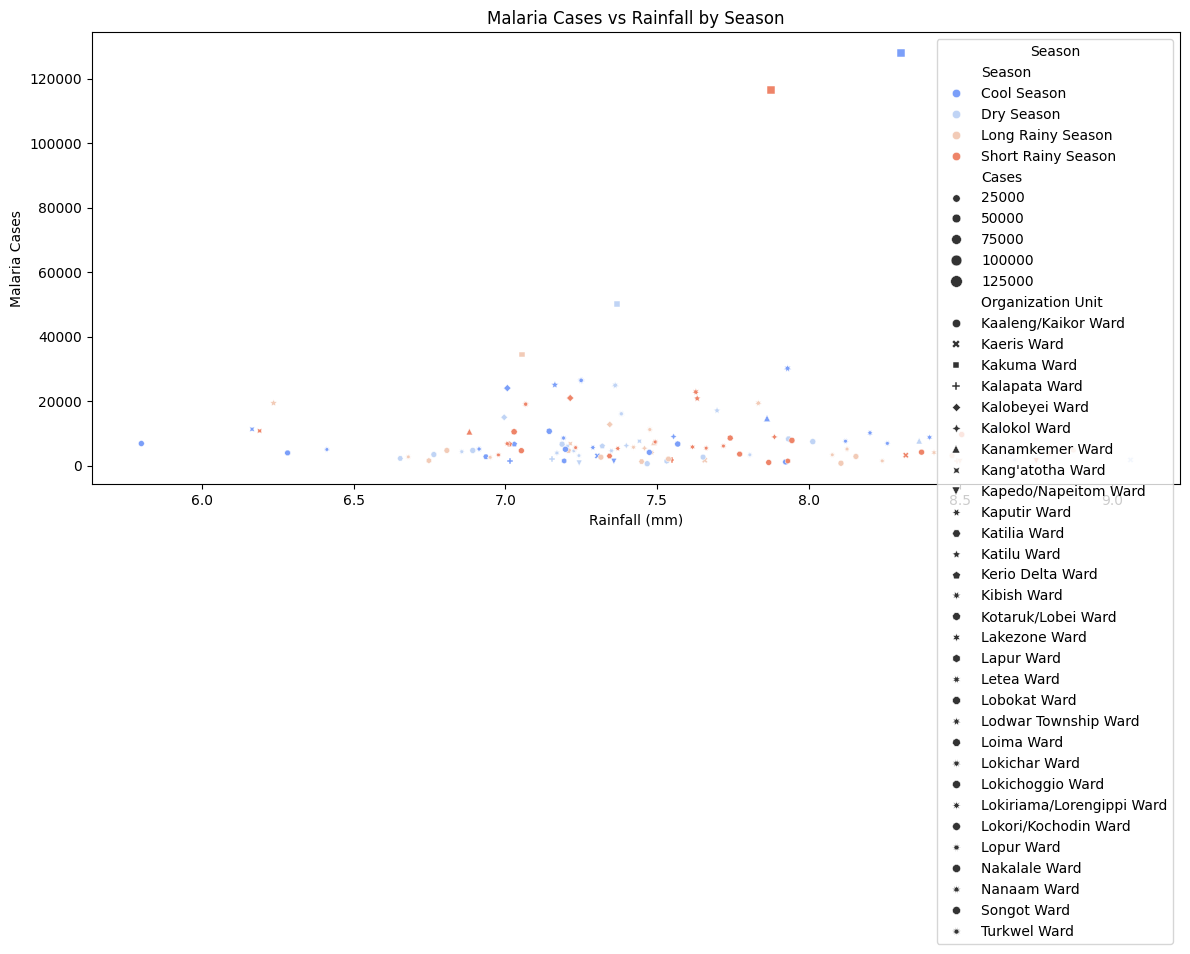

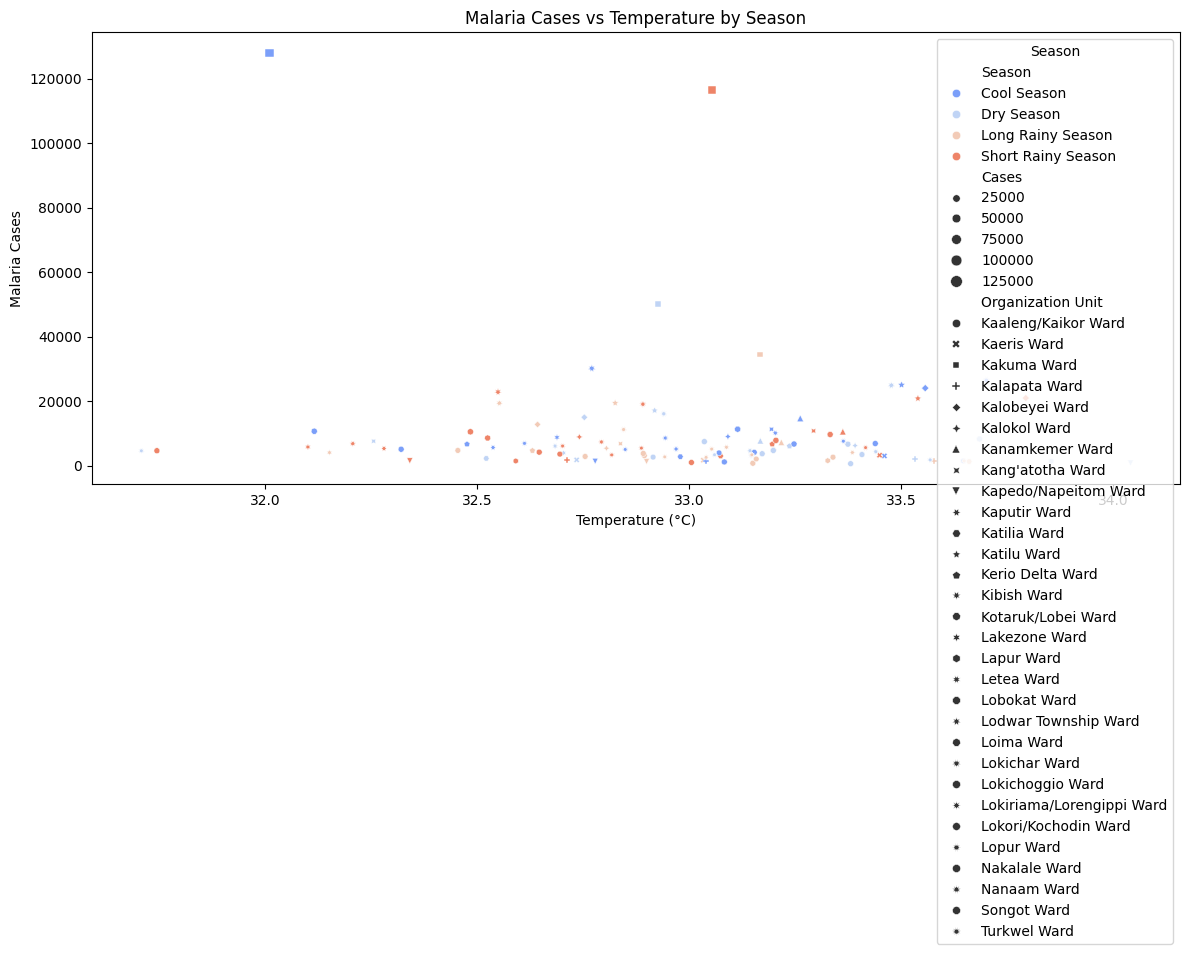

In [38]:
# Create scatterplots for malaria cases vs climate variables
plt.figure(figsize=(12, 8))
sns.scatterplot(data=seasonal_data, x='Rainfall', y='Cases', hue='Season', palette='coolwarm', style='Organization Unit', size='Cases')
plt.title("Malaria Cases vs Rainfall by Season")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Malaria Cases")
plt.legend(title="Season", loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=seasonal_data, x='Temperature', y='Cases', hue='Season', palette='coolwarm', style='Organization Unit', size='Cases')
plt.title("Malaria Cases vs Temperature by Season")
plt.xlabel("Temperature (°C)")
plt.ylabel("Malaria Cases")
plt.legend(title="Season", loc="upper right")
plt.tight_layout()
plt.show()


Insights and Next Steps
Seasonal Patterns:

Observe how malaria cases vary by season and correlate with rainfall, temperature, and humidity.
High-Risk Seasons:

Identify seasons with the highest malaria cases for each region to guide intervention planning.
Climate Impact:

Use correlation data to quantify the impact of climatic conditions on malaria prevalence.
Recommendations:

Develop strategies to mitigate high-risk seasons' impacts, such as distributing bed nets or conducting community awareness campaigns.

### Findings:

1. **Machine Learning Models:**
   - Linear Regression showed a high R² value of 0.90 and the lowest MSE among simpler models, suggesting it performed well in capturing linear relationships.
   - CatBoost outperformed other advanced models with an R² of 0.88 and MSE of 1,724,474. Its feature importance analysis revealed `Cases_lag1`, `Cases_lag4`, and `Humidity` as the most significant predictors.
   - Gradient Boosting and Random Forest achieved reasonable R² values (~0.87) but were outperformed by CatBoost.
   - Models like Decision Tree and k-Nearest Neighbors underperformed, with lower R² scores and higher MSE, making them unsuitable for deployment in this context.
   - SVR had the weakest performance with a negative R², indicating it failed to fit the data effectively.

2. **Deep Learning Models:**
   - Dense Neural Network (DNN) achieved moderate success (R²: 0.17), indicating its inability to handle sequential dependencies effectively.
   - LSTM, GRU, and BiLSTM struggled with negative R² values, possibly due to insufficient hyperparameter tuning or inadequate representation of time-series dependencies in the dataset.
   - Hybrid CNN-LSTM performed slightly better than standalone LSTM or CNN but still showed room for improvement (R²: ~ -0.91 to -1.48).
   - Overall, deep learning models underperformed compared to advanced machine learning models like CatBoost and XGBoost.

3. **Geospatial Insights:**
   - High malaria cases were concentrated in specific wards and sub-counties, clearly mapped in the geospatial visualizations.
   - Climate factors such as rainfall and humidity correlated weakly with malaria cases but were still useful predictors when combined with lag features.

4. **Feature Engineering:**
   - Lag features significantly improved model performance, highlighting the importance of historical malaria cases in prediction.
   - Interaction terms (e.g., Rainfall-Temperature interaction) were less impactful than lag features but added some value.

5. **Visualization:**
   - Trends in malaria cases showed seasonal spikes, aligning with rainy seasons, which necessitates targeted intervention during these periods.
   - Residual analysis for most models suggested potential areas for improvement, including feature engineering and handling of outliers.

---

### Recommendations:

1. **Best Model for Deployment:**
   - **CatBoost** emerged as the top-performing model due to its superior R² and MSE scores, ability to handle categorical data natively, and ease of interpretation. It should be deployed for real-time malaria case predictions in Turkana County.

2. **Further Improvements:**
   - **Hyperparameter Tuning:** Perform extensive grid search or Bayesian optimization for models like LSTM, GRU, and CNN-LSTM to enhance performance.
   - **Feature Engineering:**
     - Include additional lag features (e.g., up to 6-8 weeks) for better temporal representation.
     - Introduce external factors such as socio-economic variables or mosquito vector data if available.
   - **Data Augmentation:** Address class imbalance or sparse data issues through synthetic data generation.

3. **Geospatial and Seasonal Analysis:**
   - Refine geospatial mapping by integrating ward-specific interventions and using dynamic choropleth maps for real-time visualization.
   - Incorporate detailed seasonal analysis to predict and prepare for high-risk periods.

4. **Stakeholder Engagement:**
   - Present findings to stakeholders through interactive dashboards that highlight high-risk areas, trends, and predictive insights.
   - Collaborate with health agencies to integrate these models into operational systems, enabling timely decision-making.

---

### Conclusions:

- **CatBoost** should be prioritized for its robustness, scalability, and interpretability.
- Machine learning models currently outperform deep learning in this context due to the dataset's characteristics and lack of significant sequential dependencies.
- Geospatial analysis and seasonal trends provide actionable insights for targeted malaria interventions.
- Continued model refinement and data enhancement are critical for sustaining predictive accuracy and operational relevance.

